**AUTHORS:**

Hudson Barth,

Logan Pasternak

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

**Helper Functions + Instantiation of Strongly Convex Function**

In [190]:
# Define the quadratic function f(x, y) = 0.5 * (x^2 + 10y^2)
def f1(x, a=1, b=10):
    return 0.5 * (a * x[0]**2 + b * x[1]**2)

# Gradient of the quadratic function
def grad_f1(x, a=1, b=10):
    return np.array([a * x[0],b * x[1]])


In [191]:
# Backtracking Line Search function to determine step size
def backtracking_line_search(f, grad_f, xk, pk, alpha=0.3, beta=0.8):
    t = 1  # Initial step size
    while f(xk + t * pk) > f(xk) + alpha * t * np.dot(grad_f(xk), pk):
        t *= beta  # Reduce t if condition isn't met
    return t


**Accelerated Gradient Descent Methods**

In [192]:
# Gradient Descent with Backtracking Line Search
def gradient_descent_backtracking(f, grad_f, x0, max_iter=100):
    x = x0
    path = [x]

    for _ in range(max_iter):
        grad = grad_f(x)
        # Compute search direction (negative gradient)
        p = -grad
        # Find the optimal step size using backtracking line search
        step_size = backtracking_line_search(f, grad_f, x, p)
        # Update the solution
        x = x + step_size * p
        path.append(x)

    return np.array(path)

# Heavy Ball Method with Backtracking Line Search
def heavy_ball_backtracking(f, grad_f, x0, beta, max_iter=100):
    x = x0
    v = np.zeros_like(x)  # Momentum
    path = [x]

    for _ in range(max_iter):
        grad = grad_f(x)
        # Compute search direction with momentum
        p = -grad + beta * v
        # Find the optimal step size using backtracking line search
        step_size = backtracking_line_search(f, grad_f, x, p)
        # Update momentum and solution
        v = p
        x = x + step_size * p
        path.append(x)

    return np.array(path)

#Nesterov with backtracking line search
def nesterov(f, grad_f, x0, alpha, max_iter=100, lr=1):
  x = x0
  v = np.zeros_like(x)
  path = [x]

  for _ in range(max_iter):
    #Compute search direction with momentum
    grad = grad_f(x + alpha * v)
    p = -grad
    #Find the optimal step size using backtracking line search
    step_size = backtracking_line_search(f, grad_f, x, p)

    v = alpha * v + step_size * lr * p
    x = x + v
    path.append(x)

  return np.array(path)

#Adagrad with backtracking line search
def adagrad(f, grad_f, x0, lr=1, epsilon=1e-8, max_iter=100):
  x = x0
  v = np.zeros_like(x)
  path = [x]

  grad_prev = 0
  for t in range(max_iter):
    grad = grad_f(x)
    #Compute search direction
    theta = grad_prev + grad**2
    grad_prev = theta
    p = - lr/(epsilon + np.sqrt(theta)) * grad
    #Find the optimal step size using backtracking line search
    step_size = backtracking_line_search(f, grad_f, x, p)
    #Update solution
    v = p
    x = x + step_size * p
    path.append(x)

  return np.array(path)

#RMSprop with backtracking line search
def rmsprop(f, grad_f, x0, lr=1, beta=0.9, epsilon=1e-8, max_iter=100):
  x = x0
  v = np.zeros_like(x)
  path = [x]

  grad_prev = 0
  for t in range(max_iter):
    grad = grad_f(x)
    #Compute search direction
    theta = beta * grad_prev + (1 - beta)* grad**2
    grad_prev = theta
    p = - lr/(epsilon + np.sqrt(theta)) * grad
    #Find the optimal step size using backtracking line search
    step_size = backtracking_line_search(f, grad_f, x, p)
    #Update solution
    v = p
    x = x + step_size * p
    path.append(x)

  return np.array(path)

#Adam with backtracking line search
def adam(f, grad_f, x0, beta_1 = 0.9, beta_2=0.9, epsilon = 1e-8, lr = 1, max_iter = 100):
  x = x0
  v = np.zeros_like(x)
  path = [x]

  m = 0
  v = 0
  for t in range(max_iter):
      grad = grad_f(x)
      #Compute search direction
      m = beta_1 * m + (1 - beta_1) * grad
      v = beta_2 * v + (1 - beta_2) * grad**2
      m_hat = m / (1 - beta_1**(t+1))
      v_hat = v / (1 - beta_2**(t+1))
      p = (-lr / (epsilon + np.sqrt(v_hat))) * m_hat
      #Find the optimal step size using backtracking line search
      step_size = backtracking_line_search(f, grad_f, x, p)
      #Update solution
      x = x + step_size * p
      path.append(x)

  return np.array(path)

**Find minimum value of f1 for objective gap calculations**

In [193]:
# Use scipy.optimize.minimize to find the minimum of f1
def find_minimum(f, initial_guess):
    result = minimize(f, initial_guess, method='BFGS')  # Use BFGS method for unconstrained optimization
    return result.fun  # This gives the minimum value (p*)

# Find the minimum value (p*) for the function using scipy.optimize.minimize
p_star_f1 = find_minimum(f1, np.array([0, 0]))  # Start at [0, 0]


**Initial Starting Point and Number of Iterations**

In [194]:
# Set initial parameters for the optimization
start_f1 = np.array([2, 2])  # Starting point
max_iter = 100  # Maximum number of iterations

**Contour plot of for all optimizers f1**

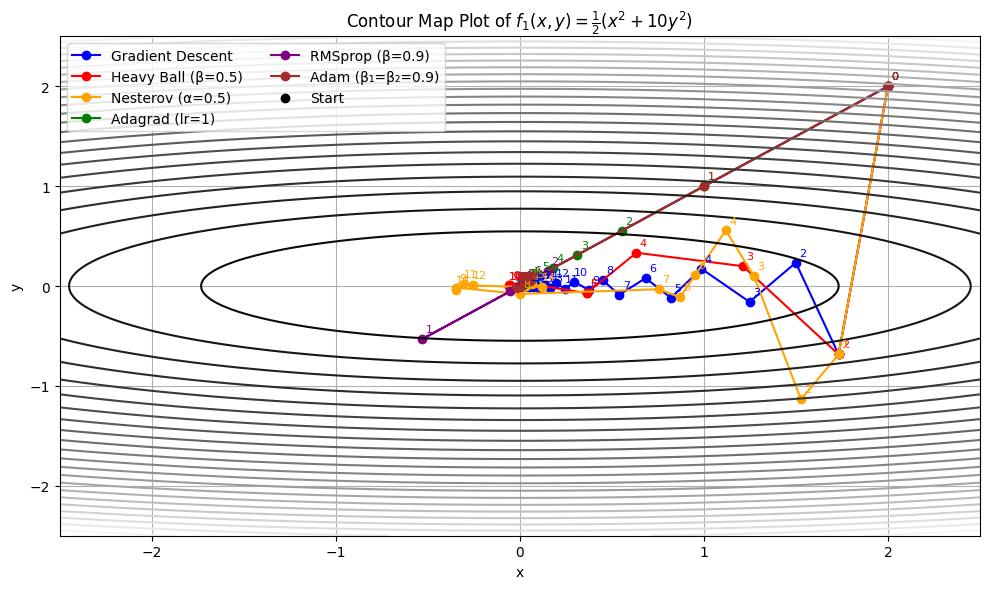

In [195]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 10 * Y_f1**2)

# --- Plot Gradient Descent Path ---
path_gd_f1 = gradient_descent_backtracking(f1, grad_f1, start_f1, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')
for i in range(len(path_gd_f1)):
        plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='blue', fontsize=8)

# --- Plot Heavy Ball Path ---
beta_values_f1 = [0.5]
for beta in beta_values_f1:
    path_hb_f1 = heavy_ball_backtracking(f1, grad_f1, start_f1, beta, max_iter)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Heavy Ball (β={beta})', color='red')
    for i in range(len(path_hb_f1)):
            plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='red', fontsize=8)

# --- Plot Nesterov Path ---
alpha_values_f1 = [0.5]
for alpha in alpha_values_f1:
    path_nesterov_f1 = nesterov(f1, grad_f1, start_f1, alpha, max_iter)
    plt.plot(path_nesterov_f1[:, 0], path_nesterov_f1[:, 1], 'o-', label=f'Nesterov (α={alpha})', color='orange')
    for i in range(len(path_nesterov_f1)):
            plt.annotate(i, (path_nesterov_f1[i, 0], path_nesterov_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='orange', fontsize=8)

# --- Plot Adagrad Path ---
lr_values_f1 = [1]
for lr in lr_values_f1:
    path_adagrad_f1 = adagrad(f1, grad_f1, start_f1, lr=lr)
    plt.plot(path_adagrad_f1[:, 0], path_adagrad_f1[:, 1], 'o-', label=f'Adagrad (lr={lr})', color='green')
    for i in range(len(path_adagrad_f1)):
            plt.annotate(i, (path_adagrad_f1[i, 0], path_adagrad_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='green', fontsize=8)

# --- Plot RMSprop Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_rmsprop_f1 = rmsprop(f1, grad_f1, start_f1, beta=beta)
    plt.plot(path_rmsprop_f1[:, 0], path_rmsprop_f1[:, 1], 'o-', label=f'RMSprop (β={beta})', color='purple')
    for i in range(len(path_rmsprop_f1)):
            plt.annotate(i, (path_rmsprop_f1[i, 0], path_rmsprop_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='purple', fontsize=8)

# --- Plot Adam Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_adam_f1 = adam(f1, grad_f1, start_f1, beta_1=beta, beta_2=beta)
    plt.plot(path_adam_f1[:, 0], path_adam_f1[:, 1], 'o-', label=f'Adam (β₁=β₂={beta})', color='brown')
    for i in range(len(path_adam_f1)):
            plt.annotate(i, (path_adam_f1[i, 0], path_adam_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='brown', fontsize=8)

# --- Final Plotting ---
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Contour Map Plot of $f_1(x, y) = \\frac{1}{2}(x^2 + 10y^2)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap vs. Number of Iterations AGD f1**

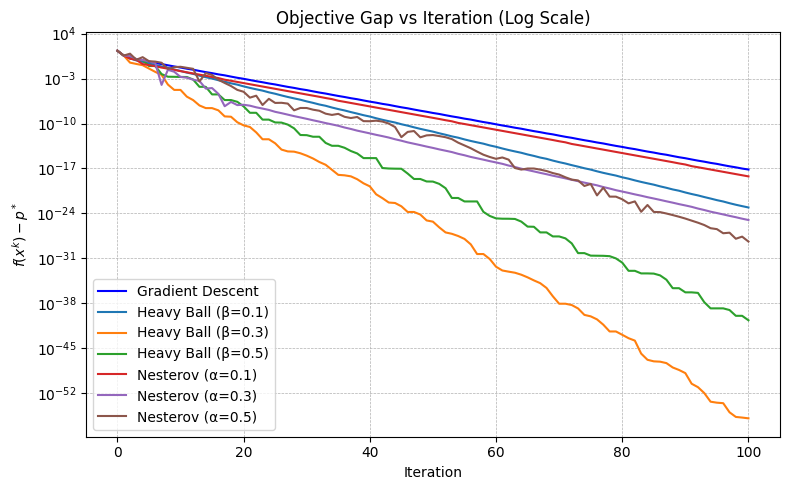

In [196]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Gradient Descent
f_vals_gd = np.array([f1(x) for x in path_gd_f1])
f_gap_gd = f_vals_gd - p_star_f1
plt.plot(f_gap_gd, label='Gradient Descent', color='blue')

# Heavy Ball with multiple beta values
hb_betas = [0.1, 0.3, 0.5]
for beta in hb_betas:
    path_hb = heavy_ball_backtracking(f1, grad_f1, start_f1, beta, max_iter)
    f_vals_hb = np.array([f1(x) for x in path_hb])
    f_gap_hb = f_vals_hb - p_star_f1
    plt.plot(f_gap_hb, label=f'Heavy Ball (β={beta})')

# Nesterov with same alpha values as above for comparison
for alpha in hb_betas:
    path_nes = nesterov(f1, grad_f1, start_f1, alpha, max_iter)
    f_vals_nes = np.array([f1(x) for x in path_nes])
    f_gap_nes = f_vals_nes - p_star_f1
    plt.plot(f_gap_nes, label=f'Nesterov (α={alpha})')

# Plot Settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent and Nesterov for f1**

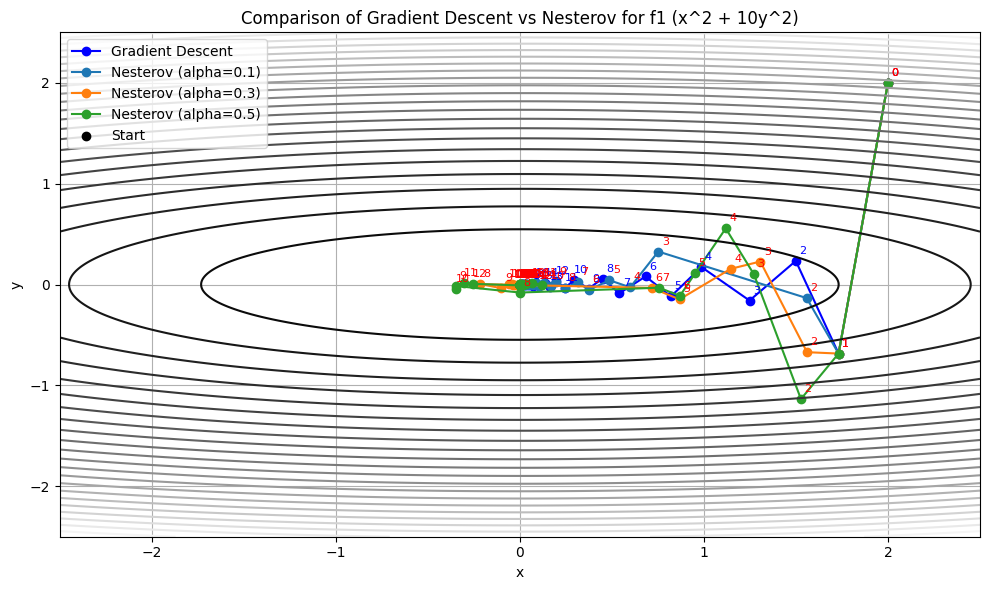

In [197]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 10 * Y_f1**2)

# Plot Gradient Descent Path
path_gd_f1 = gradient_descent_backtracking(f1, grad_f1, start_f1, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate every single iteration for Gradient Descent
for i in range(len(path_gd_f1)):
    plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', color='blue', fontsize=8)

# Plot Nesterov Path for different alpha values
alpha_values_f1 = [0.1, 0.3, 0.5]
for alpha in alpha_values_f1:
    path_hb_f1 = nesterov(f1, grad_f1, start_f1, alpha, max_iter)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Nesterov (alpha={alpha})')

    # Annotate every iteration number for Heavy Ball
    for i in range(len(path_hb_f1)):
        plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='red', fontsize=8)

# Contour plot of the function
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Comparison of Gradient Descent vs Nesterov for f1 (x^2 + 10y^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap vs Iteration Gradient Descent and Nesterov for f1**

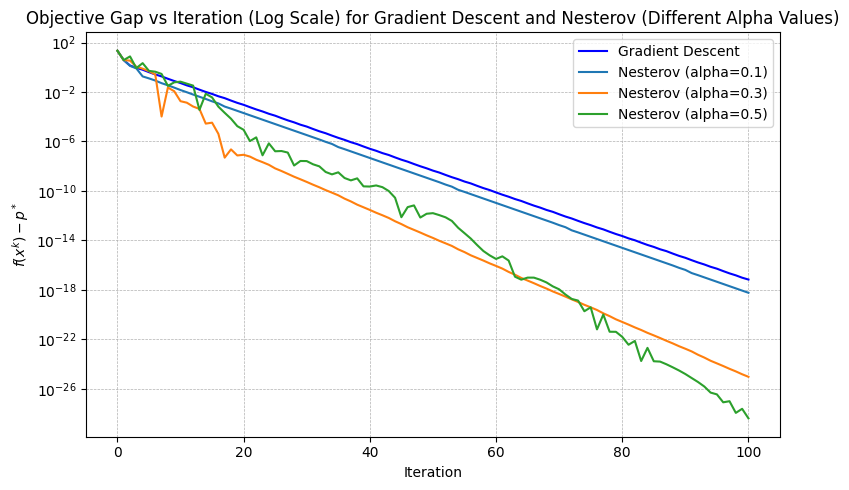

In [198]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f1 = np.array([f1(x) for x in path_gd_f1])
f_gap_gd_f1 = f_gd_f1 - p_star_f1
plt.plot(f_gap_gd_f1, label='Gradient Descent', color='blue')

# Plot Objective Gap for Nesterov with different alpha values
alpha_values_f1 = [0.1, 0.3, 0.5]
for alpha in alpha_values_f1:
    path_nes_f1 = nesterov(f1, grad_f1, start_f1, alpha, max_iter)
    f_nes_f1 = np.array([f1(x) for x in path_nes_f1])
    f_gap_nes_f1 = f_nes_f1 - p_star_f1
    plt.plot(f_gap_nes_f1, label=f'Nesterov (alpha={alpha})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Gradient Descent and Nesterov (Different Alpha Values)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent and Adagrad for f1**

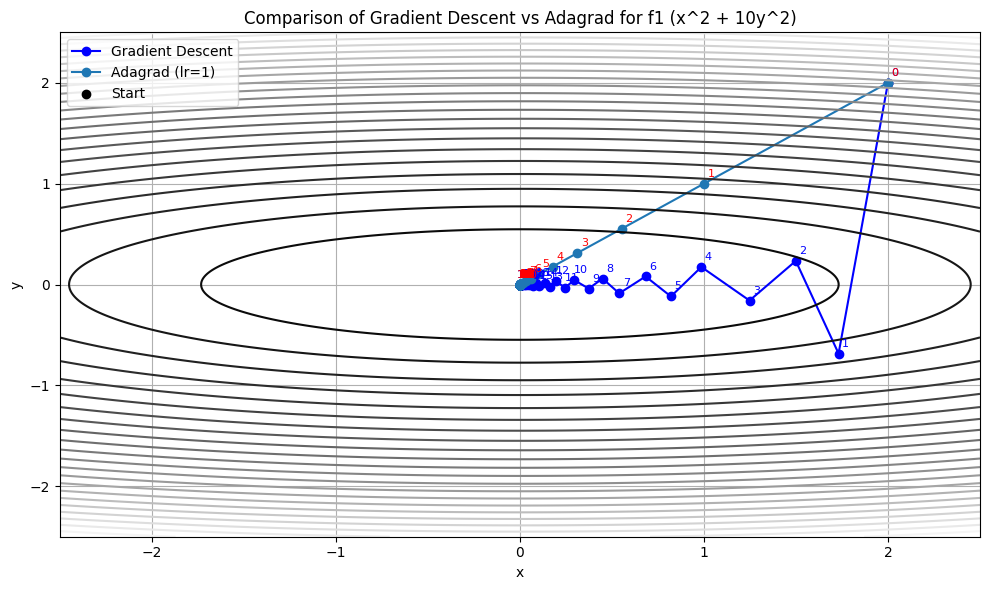

In [199]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 10 * Y_f1**2)  # Function f1(x, y)

# Plot Gradient Descent Path
path_gd_f1 = gradient_descent_backtracking(f1, grad_f1, start_f1, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate every single iteration for Gradient Descent
for i in range(len(path_gd_f1)):
    plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', color='blue', fontsize=8)

# Plot Adagrad for different learning rates
lr_values_f1 = [1]
for lr in lr_values_f1:
    path_hb_f1 = adagrad(f1, grad_f1, start_f1, lr=lr)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Adagrad (lr={lr})')

    # Annotate every iteration number for RMSprop
    for i in range(len(path_hb_f1)):
        plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='red', fontsize=8)

# Contour plot of the function
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Comparison of Gradient Descent vs Adagrad for f1 (x^2 + 10y^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap vs Iteration Adaptive LR f1**

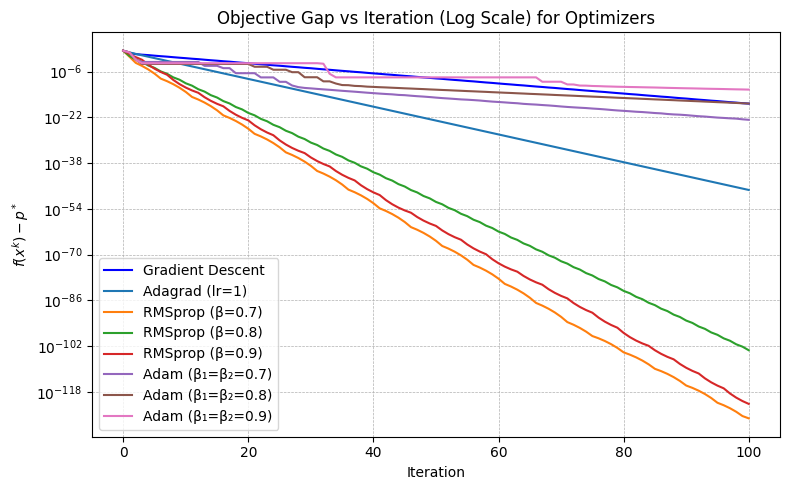

In [200]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd = np.array([f1(x) for x in path_gd_f1])
f_gap_gd = f_gd - p_star_f1
plt.plot(f_gap_gd, label='Gradient Descent', color='blue')

lr_values_f1 = [1]
# Plot Objective Gap for Adagrad
for lr in lr_values_f1:
    path_adagrad = adagrad(f1, grad_f1, start_f1, lr=lr)
    f_adagrad = np.array([f1(x) for x in path_adagrad])
    f_gap_adagrad = f_adagrad - p_star_f1
    plt.plot(f_gap_adagrad, label=f'Adagrad (lr={lr})')

beta_values_f1 = [0.7, 0.8, 0.9]
# Plot Objective Gap for RMSprop
for beta in beta_values_f1:
    path_rmsprop = rmsprop(f1, grad_f1, start_f1, beta=beta)
    f_rmsprop = np.array([f1(x) for x in path_rmsprop])
    f_gap_rmsprop = f_rmsprop - p_star_f1
    plt.plot(f_gap_rmsprop, label=f'RMSprop (β={beta})')

# Plot Objective Gap for Adam
for beta in beta_values_f1:
    path_adam = adam(f1, grad_f1, start_f1, beta_1=beta, beta_2=beta)
    f_adam = np.array([f1(x) for x in path_adam])
    f_gap_adam = f_adam - p_star_f1
    plt.plot(f_gap_adam, label=f'Adam (β₁=β₂={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Optimizers')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent and RMSprop for f1**

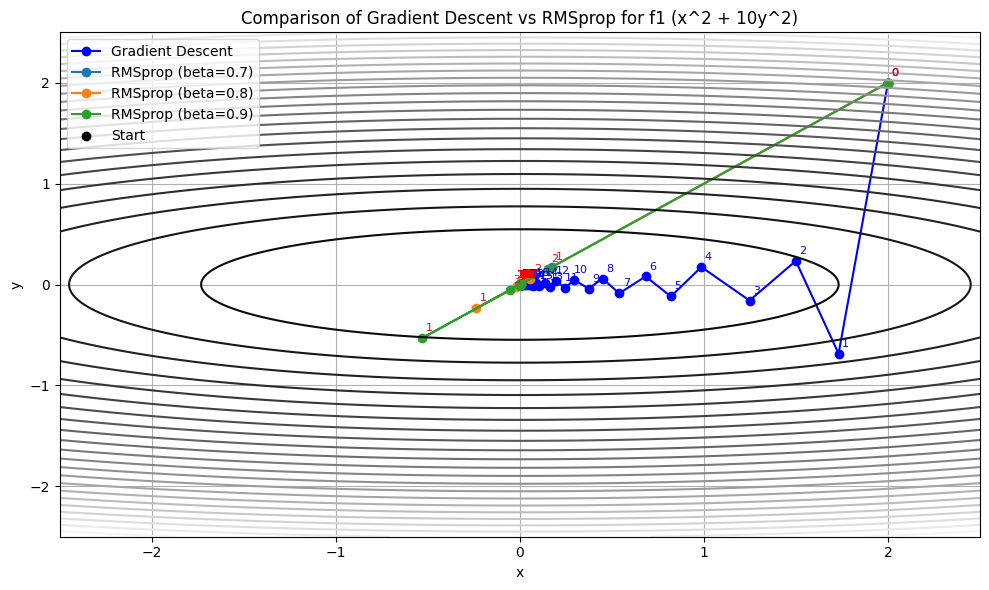

In [201]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 10 * Y_f1**2)  # Function f1(x, y)

# Plot Gradient Descent Path
path_gd_f1 = gradient_descent_backtracking(f1, grad_f1, start_f1, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate every single iteration for Gradient Descent
for i in range(len(path_gd_f1)):
    plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', color='blue', fontsize=8)

# Plot RMSprop for different beta values
beta_values_f1 = [0.7, 0.8, 0.9]
for beta in beta_values_f1:
    path_hb_f1 = rmsprop(f1, grad_f1, start_f1, beta=beta)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'RMSprop (beta={beta})')

    # Annotate every iteration number for RMSprop
    for i in range(len(path_hb_f1)):
        plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='red', fontsize=8)

# Contour plot of the function
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Comparison of Gradient Descent vs RMSprop for f1 (x^2 + 10y^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap vs Iteration Gradient Descent and RMSprop for f1**

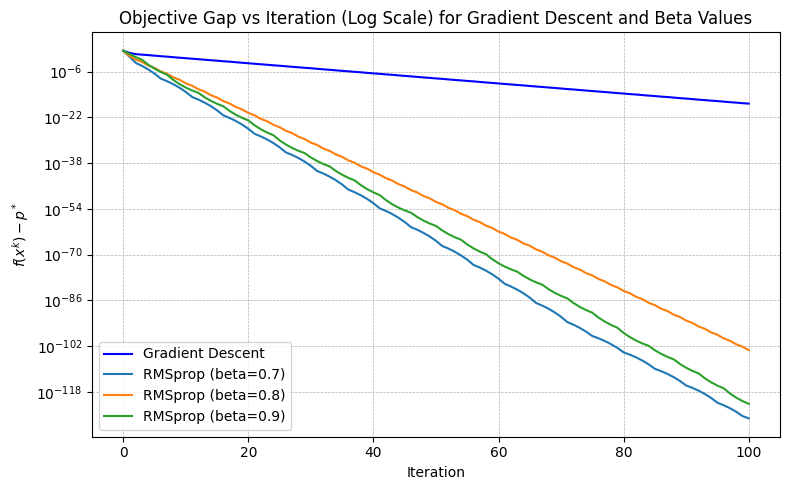

In [202]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f1 = np.array([f1(x) for x in path_gd_f1])
f_gap_gd_f1 = f_gd_f1 - p_star_f1
plt.plot(f_gap_gd_f1, label='Gradient Descent', color='blue')

# Plot Objective Gap for Adagrad
for beta in beta_values_f1:
    path_hb_f1 = rmsprop(f1, grad_f1, start_f1, beta=beta)
    f_hb_f1 = np.array([f1(x) for x in path_hb_f1])
    f_gap_hb_f1 = f_hb_f1 - p_star_f1
    plt.plot(f_gap_hb_f1, label=f'RMSprop (beta={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Gradient Descent and Beta Values')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent and Adam for f1**

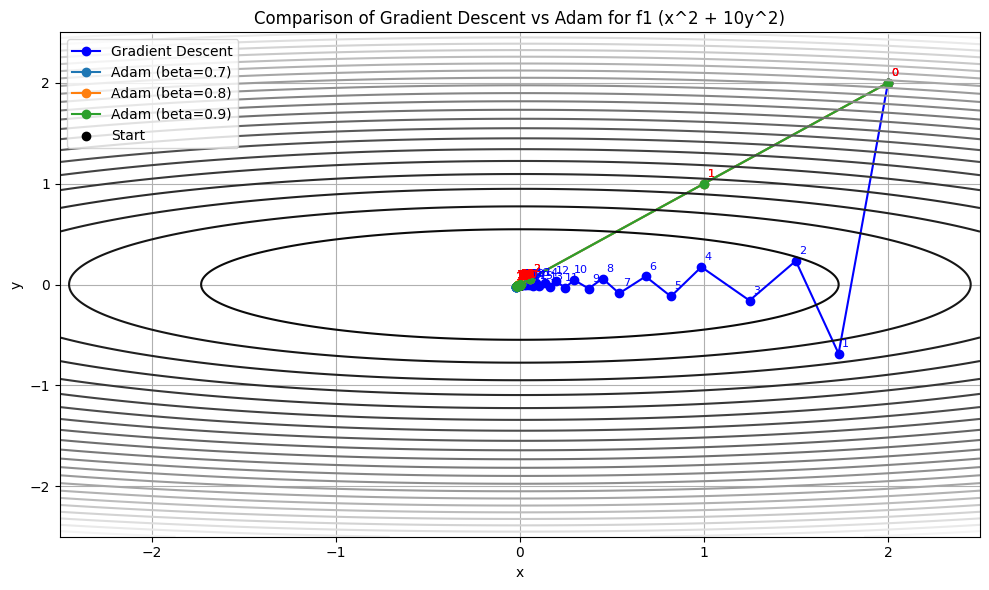

In [203]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 10 * Y_f1**2)  # Function f1(x, y)

# Plot Gradient Descent Path
path_gd_f1 = gradient_descent_backtracking(f1, grad_f1, start_f1, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate every single iteration for Gradient Descent
for i in range(len(path_gd_f1)):
    plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', color='blue', fontsize=8)

# Plot Adam for different beta values
beta_values_f1 = [0.7, 0.8, 0.9]
for beta in beta_values_f1:
    path_hb_f1 = adam(f1, grad_f1, start_f1, beta_1=beta, beta_2=beta)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Adam (beta={beta})')

    # Annotate every iteration number for Adam
    for i in range(len(path_hb_f1)):
        plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='red', fontsize=8)

# Contour plot of the function
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Comparison of Gradient Descent vs Adam for f1 (x^2 + 10y^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap vs Iteration Gradient Descent and Adam for f1**

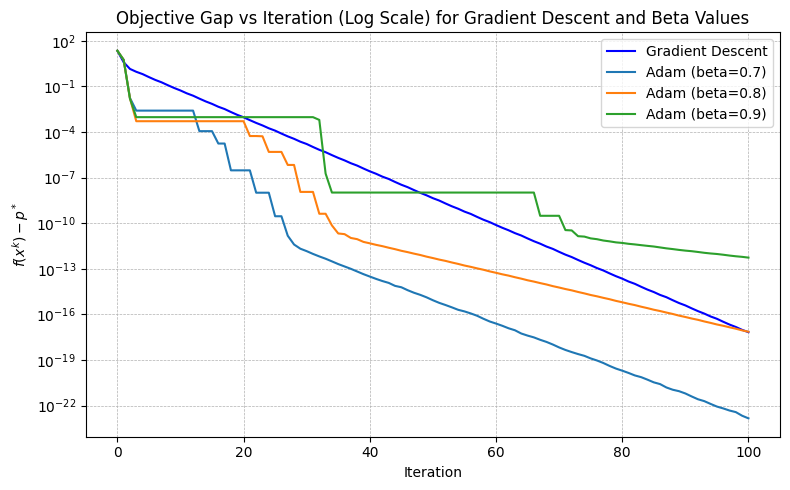

In [204]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f1 = np.array([f1(x) for x in path_gd_f1])
f_gap_gd_f1 = f_gd_f1 - p_star_f1
plt.plot(f_gap_gd_f1, label='Gradient Descent', color='blue')

# Plot Objective Gap for Adagrad
for beta in beta_values_f1:
    path_hb_f1 = adam(f1, grad_f1, start_f1, beta_1=beta, beta_2=beta)
    f_hb_f1 = np.array([f1(x) for x in path_hb_f1])
    f_gap_hb_f1 = f_hb_f1 - p_star_f1
    plt.plot(f_gap_hb_f1, label=f'Adam (beta={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Gradient Descent and Beta Values')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Instantiation of Elongated Version of Strongly Convex Function**

In [205]:
# Define an elongated quadratic function:
# f2(x, y) = 0.5 * (x^2 + 50 * y^2)
def f2(x, a=1, b=50):
    return 0.5 * (a * x[0]**2 + b * x[1]**2)

# Gradient of the function
def grad_f2(x, a=1, b=50):
    return np.array([a * x[0], b * x[1]])


**Calculate Minimum for Objective Gap Calculations**

In [206]:
# Use scipy.optimize.minimize to find the minimum value of f2
# The minimum is still at (0, 0), so p* should be 0
p_star_f2 = find_minimum(lambda x: f2(x, a=1, b=50), np.array([0.0, 0.0]))


**Initial Starting Point and Number of Iterations**

In [207]:
# Start somewhere away from the minimum to visualize the ravine
start_f2 = np.array([2.0, 2.0])
max_iter = 100  # Fixed iteration count

**Contour Plot of Gradient Descent vs Heavy Ball f2**

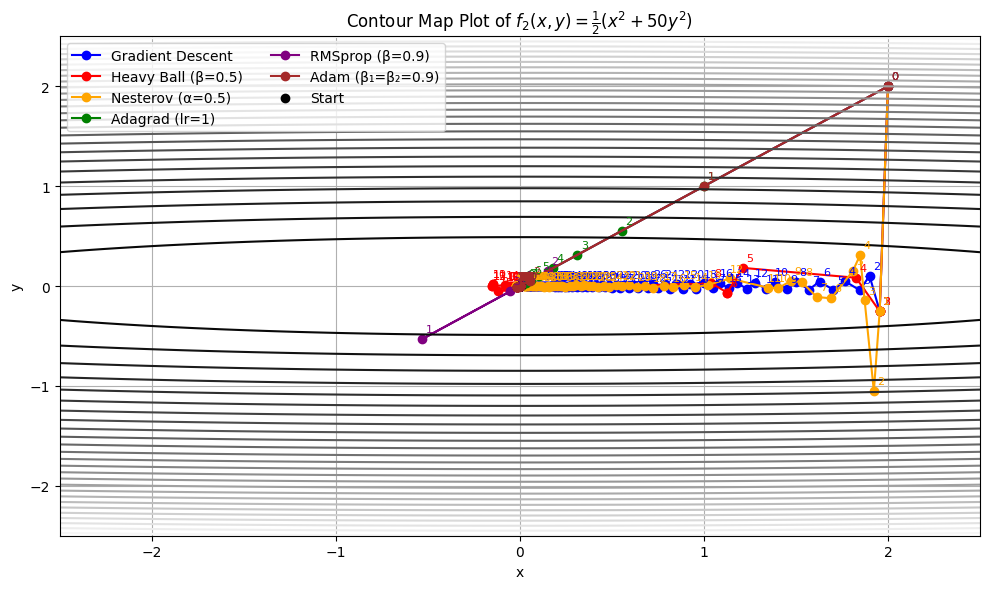

In [208]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_f1, y_f1)
Z_f1 = 0.5 * (X_f1**2 + 50 * Y_f1**2)

# --- Plot Gradient Descent Path ---
path_gd_f2 = gradient_descent_backtracking(f2, grad_f2, start_f2, max_iter)
plt.plot(path_gd_f2[:, 0], path_gd_f2[:, 1], 'o-', label='Gradient Descent', color='blue')
for i in range(len(path_gd_f2)):
        plt.annotate(i, (path_gd_f2[i, 0], path_gd_f2[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='blue', fontsize=8)

# --- Plot Heavy Ball Path ---
beta_values_f1 = [0.5]
for beta in beta_values_f1:
    path_hb_f1 = heavy_ball_backtracking(f2, grad_f2, start_f2, beta, max_iter)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Heavy Ball (β={beta})', color='red')
    for i in range(len(path_hb_f1)):
            plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='red', fontsize=8)

# --- Plot Nesterov Path ---
alpha_values_f1 = [0.5]
for alpha in alpha_values_f1:
    path_nesterov_f1 = nesterov(f2, grad_f2, start_f2, alpha, max_iter)
    plt.plot(path_nesterov_f1[:, 0], path_nesterov_f1[:, 1], 'o-', label=f'Nesterov (α={alpha})', color='orange')
    for i in range(len(path_nesterov_f1)):
            plt.annotate(i, (path_nesterov_f1[i, 0], path_nesterov_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='orange', fontsize=8)

# --- Plot Adagrad Path ---
lr_values_f1 = [1]
for lr in lr_values_f1:
    path_adagrad_f1 = adagrad(f2, grad_f2, start_f2, lr=lr)
    plt.plot(path_adagrad_f1[:, 0], path_adagrad_f1[:, 1], 'o-', label=f'Adagrad (lr={lr})', color='green')
    for i in range(len(path_adagrad_f1)):
            plt.annotate(i, (path_adagrad_f1[i, 0], path_adagrad_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='green', fontsize=8)

# --- Plot RMSprop Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_rmsprop_f1 = rmsprop(f2, grad_f2, start_f2, beta=beta)
    plt.plot(path_rmsprop_f1[:, 0], path_rmsprop_f1[:, 1], 'o-', label=f'RMSprop (β={beta})', color='purple')
    for i in range(len(path_rmsprop_f1)):
            plt.annotate(i, (path_rmsprop_f1[i, 0], path_rmsprop_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='purple', fontsize=8)

# --- Plot Adam Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_adam_f1 = adam(f2, grad_f2, start_f2, beta_1=beta, beta_2=beta)
    plt.plot(path_adam_f1[:, 0], path_adam_f1[:, 1], 'o-', label=f'Adam (β₁=β₂={beta})', color='brown')
    for i in range(len(path_adam_f1)):
            plt.annotate(i, (path_adam_f1[i, 0], path_adam_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='brown', fontsize=8)

# --- Final Plotting ---
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Contour Map Plot of $f_2(x, y) = \\frac{1}{2}(x^2 + 50y^2)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot AGD f2**

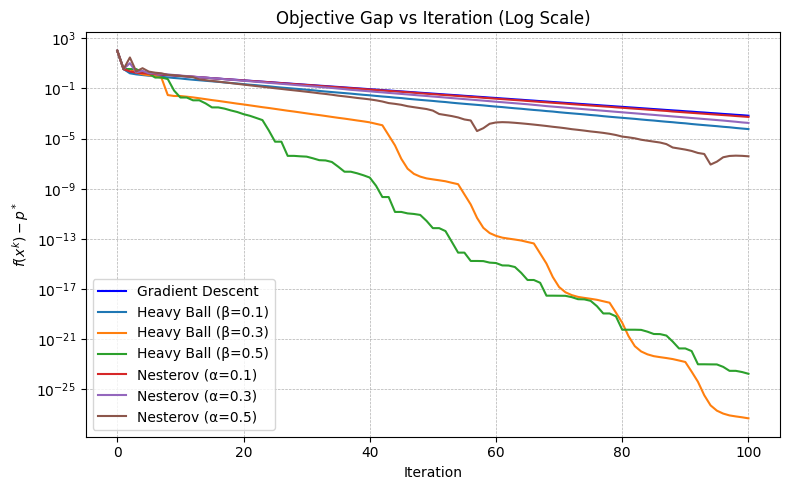

In [209]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

f_gd_f2 = np.array([f2(x, 1, 50) for x in path_gd_f2])
f_gap_gd_f2 = f_gd_f2 - p_star_f2
plt.plot(f_gap_gd_f2, label='Gradient Descent', color='blue')

# Plot Objective Gap for Heavy Ball
beta_values_f1 = [0.1, 0.3, 0.5]
for beta in beta_values_f1:
    path_hb = heavy_ball_backtracking(f2, grad_f2, start_f2, beta, max_iter)
    f_hb = np.array([f2(x) for x in path_hb])
    f_gap_hb = f_hb - p_star_f2
    plt.plot(f_gap_hb, label=f'Heavy Ball (β={beta})')

# Plot Objective Gap for Nesterov
for beta in beta_values_f1:
    path_nes = nesterov(f2, grad_f2, start_f2, beta, max_iter)
    f_nes = np.array([f2(x) for x in path_nes])
    f_gap_nes = f_nes - p_star_f2
    plt.plot(f_gap_nes, label=f'Nesterov (α={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Contour Plot of Gradient Descent vs. Nesterov f2**

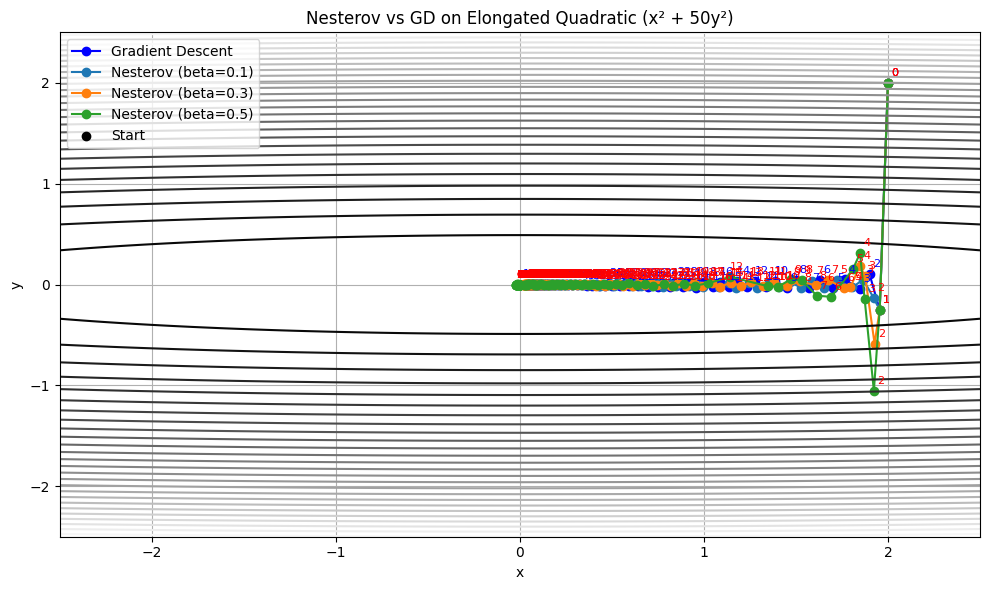

In [210]:
# Plot contours of f2 and paths taken by GD and Nesterov
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 50 * Y**2)

# Run gradient descent with backtracking
path_gd_f2 = gradient_descent_backtracking(
    lambda x: f2(x, 1, 50),
    lambda x: grad_f2(x, 1, 50),
    start_f2, max_iter
)
plt.plot(path_gd_f2[:, 0], path_gd_f2[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f2)):
    plt.annotate(i, (path_gd_f2[i, 0], path_gd_f2[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Nesterov with various momentum values
beta_values_f2 = [0.1, 0.3, 0.5]
for beta in beta_values_f2:
    path_hb_f2 = nesterov(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2, beta, max_iter
    )
    plt.plot(path_hb_f2[:, 0], path_hb_f2[:, 1], 'o-', label=f'Nesterov (beta={beta})')

    # Annotate iterations for HB
    for i in range(len(path_hb_f2)):
        plt.annotate(i, (path_hb_f2[i, 0], path_hb_f2[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f2, color='black', label='Start')
plt.title('Nesterov vs GD on Elongated Quadratic (x² + 50y²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Nesterov f2**

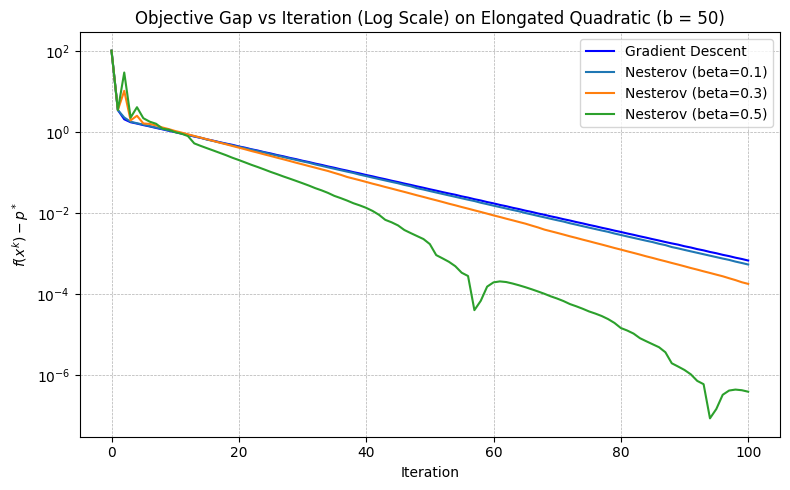

In [211]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f2 = np.array([f2(x, 1, 50) for x in path_gd_f2])
f_gap_gd_f2 = f_gd_f2 - p_star_f2
plt.plot(f_gap_gd_f2, label='Gradient Descent', color='blue')

# Nesterov objective gaps
for beta in beta_values_f2:
    path_hb_f2 = nesterov(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2, beta, max_iter
    )
    f_hb_f2 = np.array([f2(x, 1, 50) for x in path_hb_f2])
    f_gap_hb_f2 = f_hb_f2 - p_star_f2
    plt.plot(f_gap_hb_f2, label=f'Nesterov (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Elongated Quadratic (b = 50)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adagrad f2**

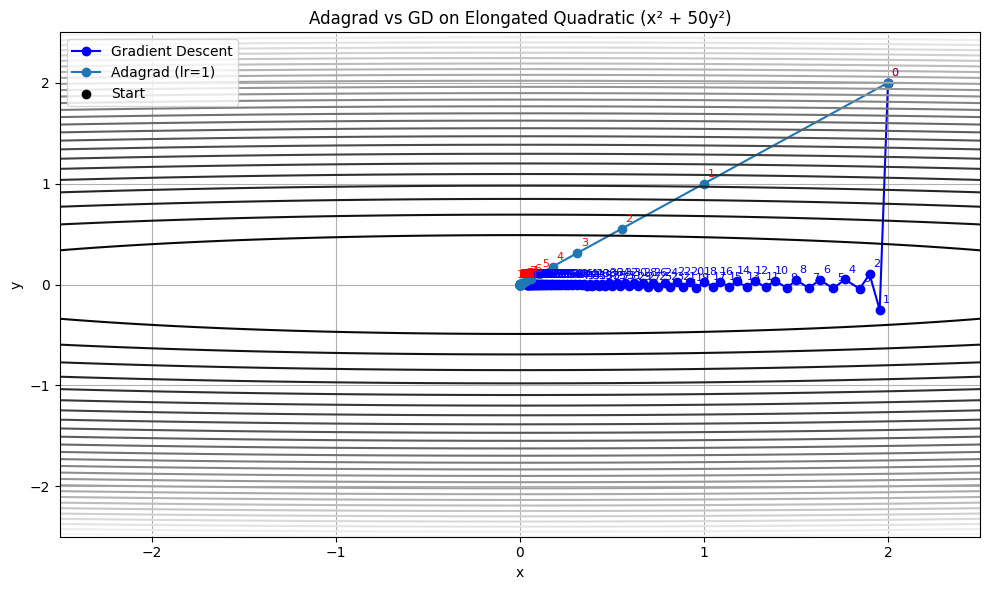

In [212]:
# Plot contours of f2 and paths taken by GD and Adagrad
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 50 * Y**2)

# Run gradient descent with backtracking
path_gd_f2 = gradient_descent_backtracking(
    lambda x: f2(x, 1, 50),
    lambda x: grad_f2(x, 1, 50),
    start_f2, max_iter
)
plt.plot(path_gd_f2[:, 0], path_gd_f2[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f2)):
    plt.annotate(i, (path_gd_f2[i, 0], path_gd_f2[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adagrad with various lr values
lr_values_f2 = [1]
for lr in lr_values_f2:
    path_hb_f2 = adagrad(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2, lr=lr
    )
    plt.plot(path_hb_f2[:, 0], path_hb_f2[:, 1], 'o-', label=f'Adagrad (lr={lr})')

    # Annotate iterations for Adagrad
    for i in range(len(path_hb_f2)):
        plt.annotate(i, (path_hb_f2[i, 0], path_hb_f2[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f2, color='black', label='Start')
plt.title('Adagrad vs GD on Elongated Quadratic (x² + 50y²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Adaptive f2**

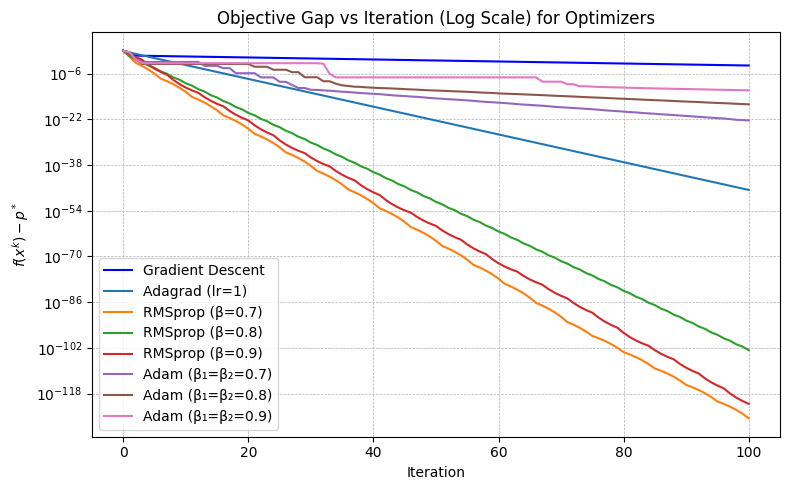

In [213]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f2 = np.array([f2(x, 1, 50) for x in path_gd_f2])
f_gap_gd_f2 = f_gd_f2 - p_star_f2
plt.plot(f_gap_gd_f2, label='Gradient Descent', color='blue')

lr_values_f1 = [1]
# Plot Objective Gap for Adagrad
for lr in lr_values_f1:
    path_adagrad = adagrad(f2, grad_f2, start_f2, lr=lr)
    f_adagrad = np.array([f2(x) for x in path_adagrad])
    f_gap_adagrad = f_adagrad - p_star_f2
    plt.plot(f_gap_adagrad, label=f'Adagrad (lr={lr})')

beta_values_f1 = [0.7, 0.8, 0.9]
# Plot Objective Gap for RMSprop
for beta in beta_values_f1:
    path_rmsprop = rmsprop(f2, grad_f2, start_f2, beta=beta)
    f_rmsprop = np.array([f2(x) for x in path_rmsprop])
    f_gap_rmsprop = f_rmsprop - p_star_f2
    plt.plot(f_gap_rmsprop, label=f'RMSprop (β={beta})')

# Plot Objective Gap for Adam
for beta in beta_values_f1:
    path_adam = adam(f2, grad_f2, start_f2, beta_1=beta, beta_2=beta)
    f_adam = np.array([f2(x) for x in path_adam])
    f_gap_adam = f_adam - p_star_f2
    plt.plot(f_gap_adam, label=f'Adam (β₁=β₂={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Optimizers')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. RMSprop f2**

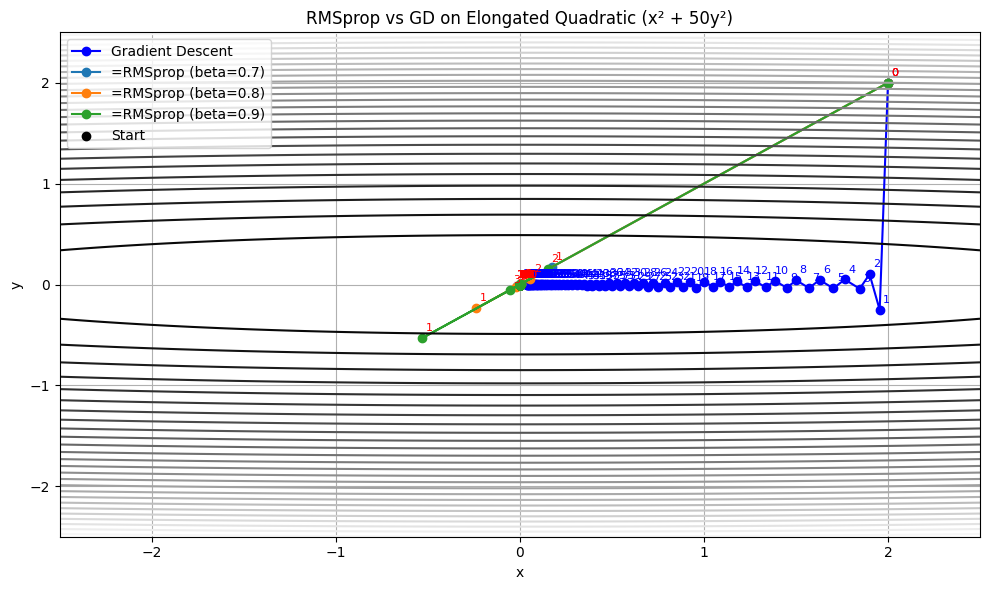

In [214]:
# Plot contours of f2 and paths taken by GD and RMSprop
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 50 * Y**2)

# Run gradient descent with backtracking
path_gd_f2 = gradient_descent_backtracking(
    lambda x: f2(x, 1, 50),
    lambda x: grad_f2(x, 1, 50),
    start_f2, max_iter
)
plt.plot(path_gd_f2[:, 0], path_gd_f2[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f2)):
    plt.annotate(i, (path_gd_f2[i, 0], path_gd_f2[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adagrad with various beta values
beta_values_f2 = [0.7, 0.8, 0.9]
for beta in beta_values_f2:
    path_hb_f2 = rmsprop(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2, beta=beta
    )
    plt.plot(path_hb_f2[:, 0], path_hb_f2[:, 1], 'o-', label=f'=RMSprop (beta={beta})')

    # Annotate iterations for Adagrad
    for i in range(len(path_hb_f2)):
        plt.annotate(i, (path_hb_f2[i, 0], path_hb_f2[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f2, color='black', label='Start')
plt.title('RMSprop vs GD on Elongated Quadratic (x² + 50y²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. RMSprop f2**

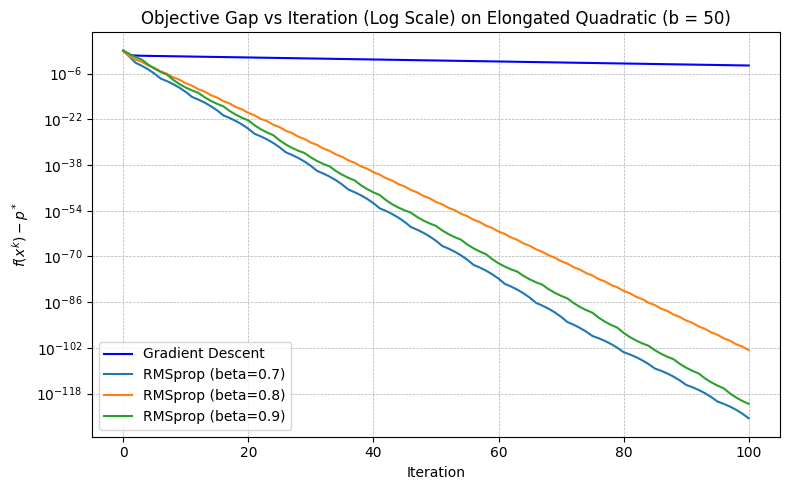

In [215]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f2 = np.array([f2(x, 1, 50) for x in path_gd_f2])
f_gap_gd_f2 = f_gd_f2 - p_star_f2
plt.plot(f_gap_gd_f2, label='Gradient Descent', color='blue')

# Nesterov objective gaps
for beta in beta_values_f2:
    path_hb_f2 = rmsprop(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2, beta=beta
    )
    f_hb_f2 = np.array([f2(x, 1, 50) for x in path_hb_f2])
    f_gap_hb_f2 = f_hb_f2 - p_star_f2
    plt.plot(f_gap_hb_f2, label=f'RMSprop (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Elongated Quadratic (b = 50)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adam f2**

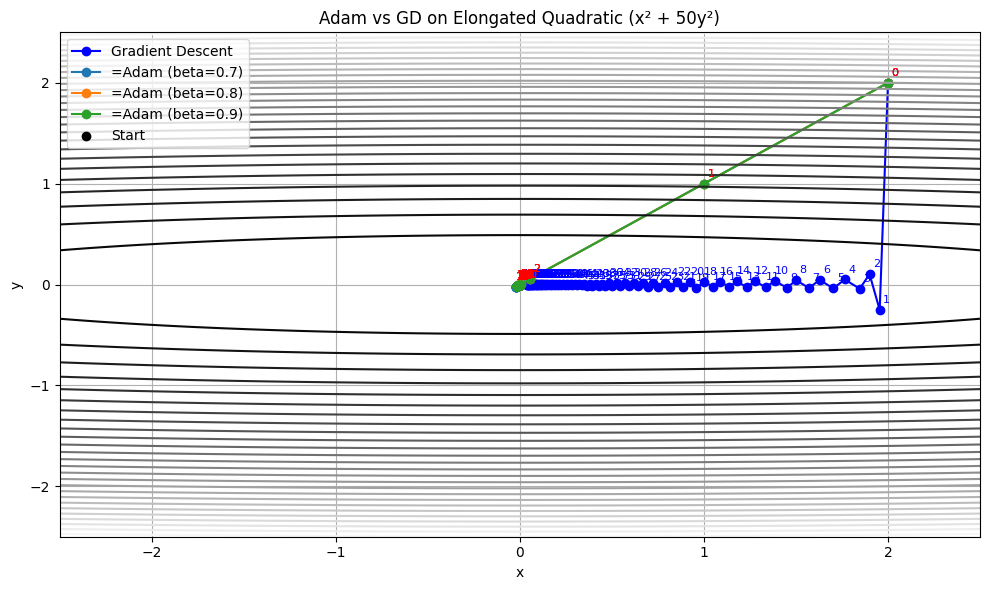

In [216]:
# Plot contours of f2 and paths taken by GD and Adam
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 50 * Y**2)

# Run gradient descent with backtracking
path_gd_f2 = gradient_descent_backtracking(
    lambda x: f2(x, 1, 50),
    lambda x: grad_f2(x, 1, 50),
    start_f2, max_iter
)
plt.plot(path_gd_f2[:, 0], path_gd_f2[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f2)):
    plt.annotate(i, (path_gd_f2[i, 0], path_gd_f2[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adagrad with various beta values
beta_values_f2 = [0.7, 0.8, 0.9]
for beta in beta_values_f2:
    path_hb_f2 = adam(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2,
        beta_1=beta,
        beta_2=beta
    )
    plt.plot(path_hb_f2[:, 0], path_hb_f2[:, 1], 'o-', label=f'=Adam (beta={beta})')

    # Annotate iterations for Adagrad
    for i in range(len(path_hb_f2)):
        plt.annotate(i, (path_hb_f2[i, 0], path_hb_f2[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f2, color='black', label='Start')
plt.title('Adam vs GD on Elongated Quadratic (x² + 50y²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Adam f2**

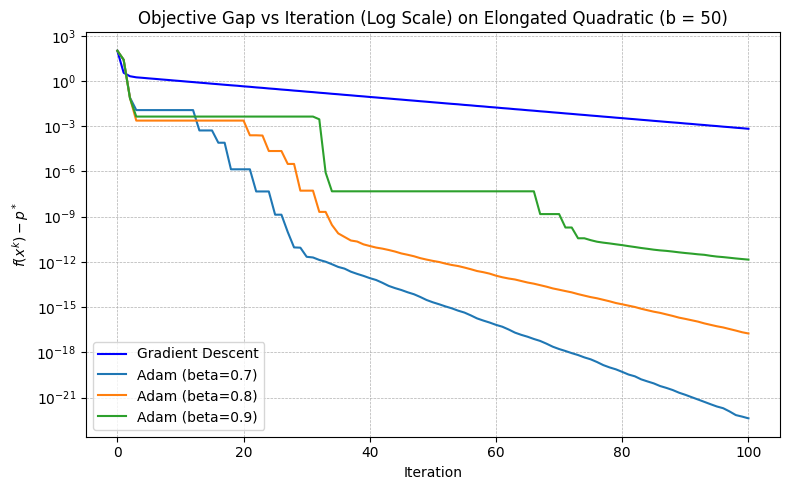

In [217]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f2 = np.array([f2(x, 1, 50) for x in path_gd_f2])
f_gap_gd_f2 = f_gd_f2 - p_star_f2
plt.plot(f_gap_gd_f2, label='Gradient Descent', color='blue')

# Nesterov objective gaps
for beta in beta_values_f2:
    path_hb_f2 = adam(
        lambda x: f2(x, 1, 50),
        lambda x: grad_f2(x, 1, 50),
        start_f2,
        beta_1=beta,
        beta_2=beta
    )
    f_hb_f2 = np.array([f2(x, 1, 50) for x in path_hb_f2])
    f_gap_hb_f2 = f_hb_f2 - p_star_f2
    plt.plot(f_gap_hb_f2, label=f'Adam (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Elongated Quadratic (b = 50)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Instantiation of Non-convex function**

In [218]:
# Define an rosenbrock function:
# f3(x, y) = (1-x)^2 + 5*(y-x^2)^2
def f3(x, a=1, b=10):
    return (a-x[0])**2 + b*(x[1] - x[0]**2)**2

# Gradient of the function
def grad_f3(x, a=1, b=10):
    return np.array([-2*(a-x[0]) + 4*b*x[0]*(x[1]-x[0]**2), 2*b*(x[1]-x[0]**2)])

**Initialization**

In [219]:
# Use scipy.optimize.minimize to find the minimum value of f3
# For rosenbrook function of the form above, we know that minimum is at (x,y) = (1,1)
# The minimum is at (1, 1). p* should be 0
p_star_f3 = find_minimum(lambda x: f3(x, a=1, b=10), np.array([1.0, 1.0]))

**Initial Starting Point and Number of Iterations**

In [220]:
# Start somewhere away from the minimum to visualize the ravine
start_f3 = np.array([0.5, 2.0])
max_iter = 100

**Contour Plot of Gradient Descent vs. Heavy Ball f3**

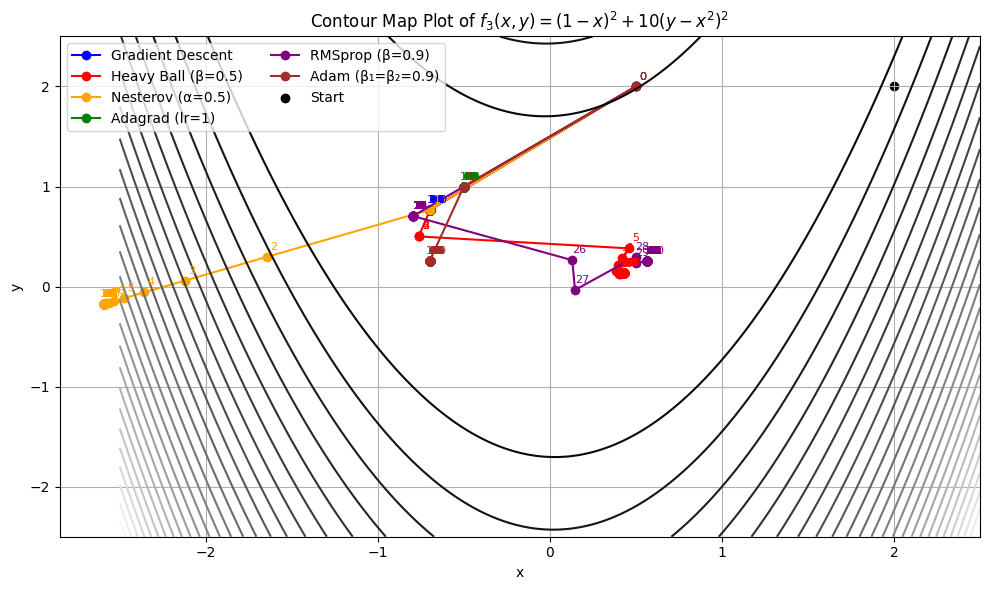

In [221]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function

# Meshgrid for contour plotting
x_f1 = np.linspace(-1, 2, 400)
y_f1 = np.linspace(-1, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_vals, y_vals)
Z_f1 = (1-X)**2 + 10*(Y - X**2)**2

# --- Plot Gradient Descent Path ---
path_gd_f1 = gradient_descent_backtracking(f3, grad_f3, start_f3, max_iter)
plt.plot(path_gd_f1[:, 0], path_gd_f1[:, 1], 'o-', label='Gradient Descent', color='blue')
for i in range(len(path_gd_f1)):
        plt.annotate(i, (path_gd_f1[i, 0], path_gd_f1[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='blue', fontsize=8)

# --- Plot Heavy Ball Path ---
beta_values_f1 = [0.5]
for beta in beta_values_f1:
    path_hb_f1 = heavy_ball_backtracking(f3, grad_f3, start_f3, beta, max_iter)
    plt.plot(path_hb_f1[:, 0], path_hb_f1[:, 1], 'o-', label=f'Heavy Ball (β={beta})', color='red')
    for i in range(len(path_hb_f1)):
            plt.annotate(i, (path_hb_f1[i, 0], path_hb_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='red', fontsize=8)

# --- Plot Nesterov Path ---
alpha_values_f1 = [0.5]
for alpha in alpha_values_f1:
    path_nesterov_f1 = nesterov(f3, grad_f3, start_f3, alpha, max_iter)
    plt.plot(path_nesterov_f1[:, 0], path_nesterov_f1[:, 1], 'o-', label=f'Nesterov (α={alpha})', color='orange')
    for i in range(len(path_nesterov_f1)):
            plt.annotate(i, (path_nesterov_f1[i, 0], path_nesterov_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='orange', fontsize=8)

# --- Plot Adagrad Path ---
lr_values_f1 = [1]
for lr in lr_values_f1:
    path_adagrad_f1 = adagrad(f3, grad_f3, start_f3, lr=lr)
    plt.plot(path_adagrad_f1[:, 0], path_adagrad_f1[:, 1], 'o-', label=f'Adagrad (lr={lr})', color='green')
    for i in range(len(path_adagrad_f1)):
            plt.annotate(i, (path_adagrad_f1[i, 0], path_adagrad_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='green', fontsize=8)

# --- Plot RMSprop Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_rmsprop_f1 = rmsprop(f3, grad_f3, start_f3, beta=beta)
    plt.plot(path_rmsprop_f1[:, 0], path_rmsprop_f1[:, 1], 'o-', label=f'RMSprop (β={beta})', color='purple')
    for i in range(len(path_rmsprop_f1)):
            plt.annotate(i, (path_rmsprop_f1[i, 0], path_rmsprop_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='purple', fontsize=8)

# --- Plot Adam Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_adam_f1 = adam(f3, grad_f3, start_f3, beta_1=beta, beta_2=beta)
    plt.plot(path_adam_f1[:, 0], path_adam_f1[:, 1], 'o-', label=f'Adam (β₁=β₂={beta})', color='brown')
    for i in range(len(path_adam_f1)):
            plt.annotate(i, (path_adam_f1[i, 0], path_adam_f1[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='brown', fontsize=8)

# --- Final Plotting ---
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Contour Map Plot of $f_3(x, y) = (1-x)^2 + 10(y - x^2)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot AGD f3**

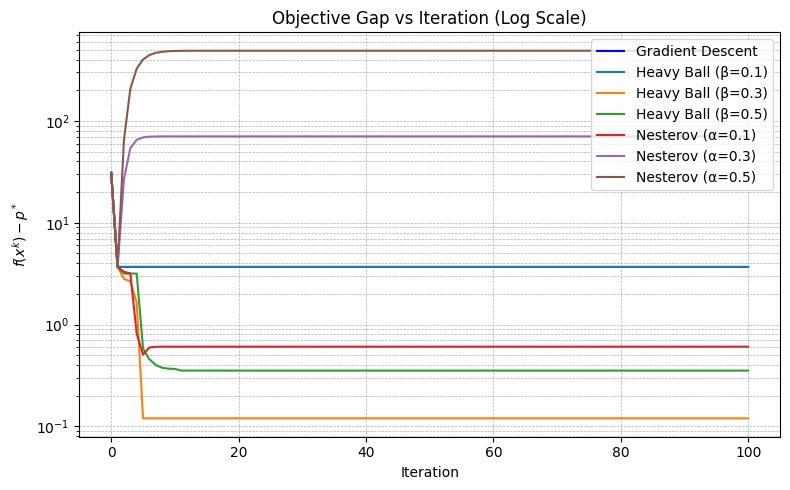

In [222]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f3 = np.array([f3(x) for x in path_gd_f1])
f_gap_gd_f3 = f_gd_f3 - p_star_f3
plt.plot(f_gap_gd_f3, label='Gradient Descent', color='blue')

# Plot Objective Gap for Heavy Ball
beta_values_f1 = [0.1, 0.3, 0.5]
for beta in beta_values_f1:
    path_hb = heavy_ball_backtracking(f3, grad_f3, start_f3, beta, max_iter)
    f_hb = np.array([f3(x) for x in path_hb])
    f_gap_hb = f_hb - p_star_f3
    plt.plot(f_gap_hb, label=f'Heavy Ball (β={beta})')

# Plot Objective Gap for Nesterov
for beta in beta_values_f1:
    path_nes = nesterov(f3, grad_f3, start_f3, beta, max_iter)
    f_nes = np.array([f3(x) for x in path_nes])
    f_gap_nes = f_nes - p_star_f3
    plt.plot(f_gap_nes, label=f'Nesterov (α={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Nesterov f3**

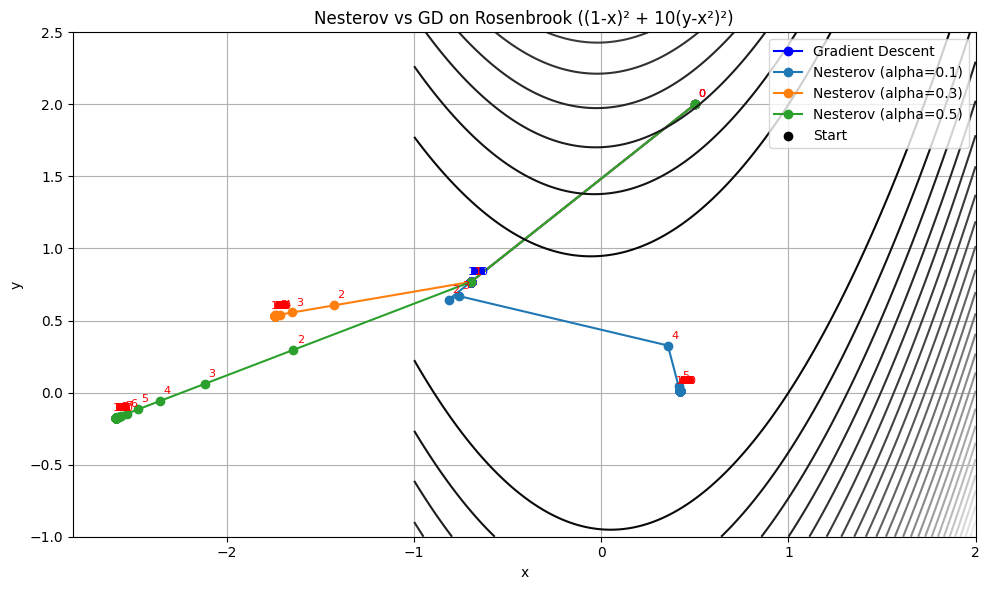

In [223]:
# Plot contours of f2 and paths taken by GD and Nesterov
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-1, 2, 400)
y_vals = np.linspace(-1, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1-X)**2 + 10*(Y - X**2)**2

# Run gradient descent with backtracking
path_gd_f3 = gradient_descent_backtracking(
    lambda x: f3(x, 1, 10),
    lambda x: grad_f3(x, 1, 10),
    start_f3, max_iter
)
plt.plot(path_gd_f3[:, 0], path_gd_f3[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f3)):
    plt.annotate(i, (path_gd_f3[i, 0], path_gd_f3[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Nesterov with various momentum values
beta_values_f3 = [0.1, 0.3, 0.5]
for beta in beta_values_f3:
    path_hb_f3 = nesterov(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3, beta, max_iter
    )
    plt.plot(path_hb_f3[:, 0], path_hb_f3[:, 1], 'o-', label=f'Nesterov (alpha={beta})')

    # Annotate iterations for Nesterov
    for i in range(len(path_hb_f3)):
        plt.annotate(i, (path_hb_f3[i, 0], path_hb_f3[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f3, color='black', label='Start')
plt.title('Nesterov vs GD on Rosenbrook ((1-x)² + 10(y-x²)²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Nesterov f3**

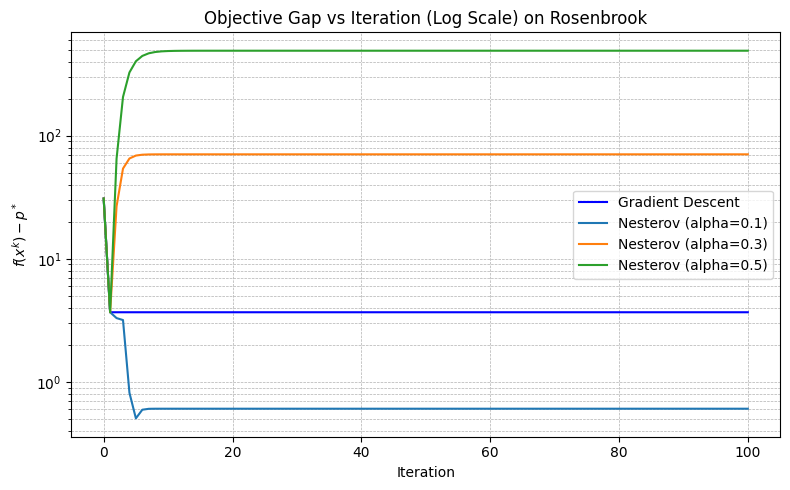

In [224]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f3 = np.array([f3(x, 1, 10) for x in path_gd_f3])
f_gap_gd_f3 = f_gd_f3 - p_star_f3
plt.plot(f_gap_gd_f3, label='Gradient Descent', color='blue')

# Nesterov objective gaps
for beta in beta_values_f3:
    path_hb_f3 = nesterov(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3, beta, max_iter
    )
    f_hb_f3= np.array([f3(x, 1, 10) for x in path_hb_f3])
    f_gap_hb_f3 = f_hb_f3 - p_star_f3
    plt.plot(f_gap_hb_f3, label=f'Nesterov (alpha={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Rosenbrook')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adagrad f3**

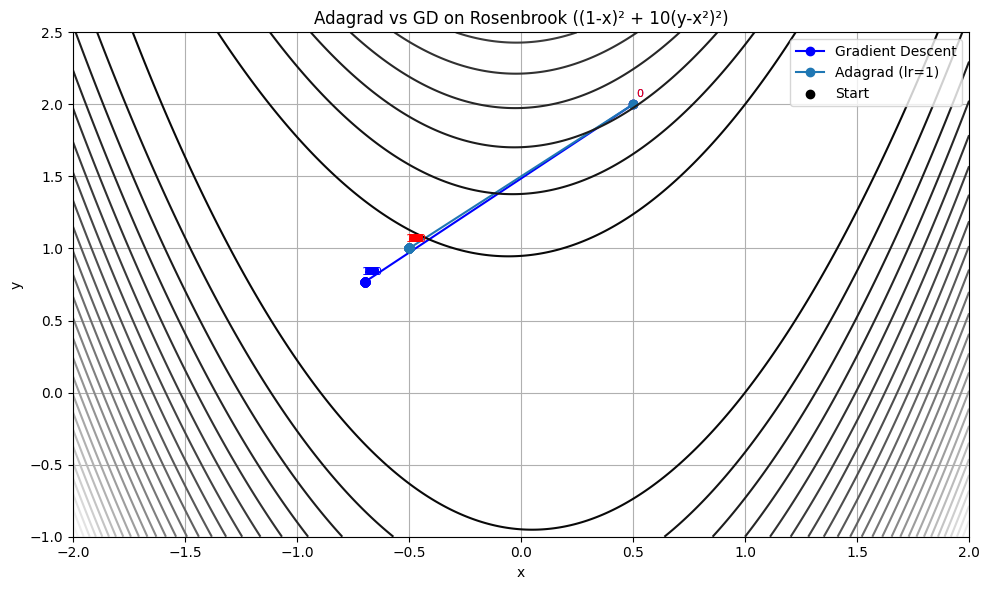

In [225]:
# Plot contours of f2 and paths taken by GD and Adagrad
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1-X)**2 + 10*(Y - X**2)**2

# Run gradient descent with backtracking
path_gd_f3 = gradient_descent_backtracking(
    lambda x: f3(x, 1, 10),
    lambda x: grad_f3(x, 1, 10),
    start_f3, max_iter
)
plt.plot(path_gd_f3[:, 0], path_gd_f3[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f3)):
    plt.annotate(i, (path_gd_f3[i, 0], path_gd_f3[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Nesterov with various momentum values
lr_values_f3 = [1]
for lr in lr_values_f3:
    path_hb_f3 = adagrad(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3,
        lr=lr
    )
    plt.plot(path_hb_f3[:, 0], path_hb_f3[:, 1], 'o-', label=f'Adagrad (lr={lr})')

    # Annotate iterations for Nesterov
    for i in range(len(path_hb_f3)):
        plt.annotate(i, (path_hb_f3[i, 0], path_hb_f3[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f3, color='black', label='Start')
plt.title('Adagrad vs GD on Rosenbrook ((1-x)² + 10(y-x²)²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Adagrad f3**

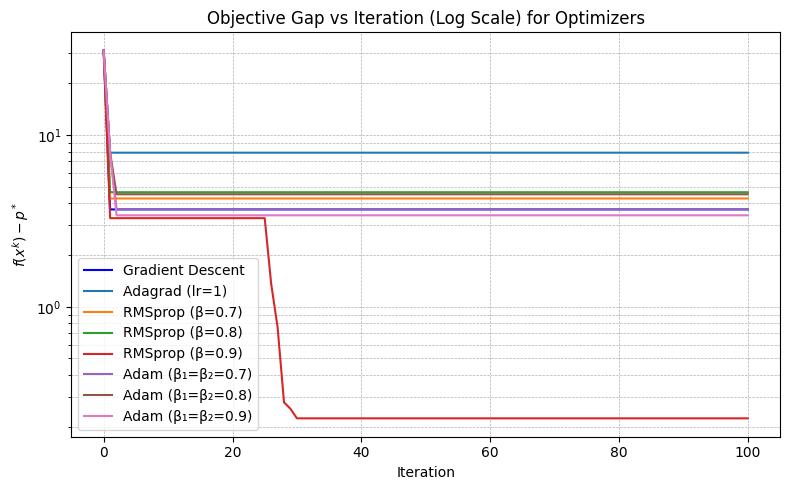

In [226]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd = np.array([f3(x) for x in path_gd_f3])
f_gap_gd = f_gd - p_star_f3
plt.plot(f_gap_gd, label='Gradient Descent', color='blue')

lr_values_f1 = [1]
# Plot Objective Gap for Adagrad
for lr in lr_values_f1:
    path_adagrad = adagrad(f3, grad_f3, start_f3, lr=lr)
    f_adagrad = np.array([f3(x) for x in path_adagrad])
    f_gap_adagrad = f_adagrad - p_star_f3
    plt.plot(f_gap_adagrad, label=f'Adagrad (lr={lr})')

beta_values_f1 = [0.7, 0.8, 0.9]
# Plot Objective Gap for RMSprop
for beta in beta_values_f1:
    path_rmsprop = rmsprop(f3, grad_f3, start_f3, beta=beta)
    f_rmsprop = np.array([f3(x) for x in path_rmsprop])
    f_gap_rmsprop = f_rmsprop - p_star_f3
    plt.plot(f_gap_rmsprop, label=f'RMSprop (β={beta})')

# Plot Objective Gap for Adam
for beta in beta_values_f1:
    path_adam = adam(f3, grad_f3, start_f3, beta_1=beta, beta_2=beta)
    f_adam = np.array([f3(x) for x in path_adam])
    f_gap_adam = f_adam - p_star_f3
    plt.plot(f_gap_adam, label=f'Adam (β₁=β₂={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Optimizers')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. RMSprop f3**

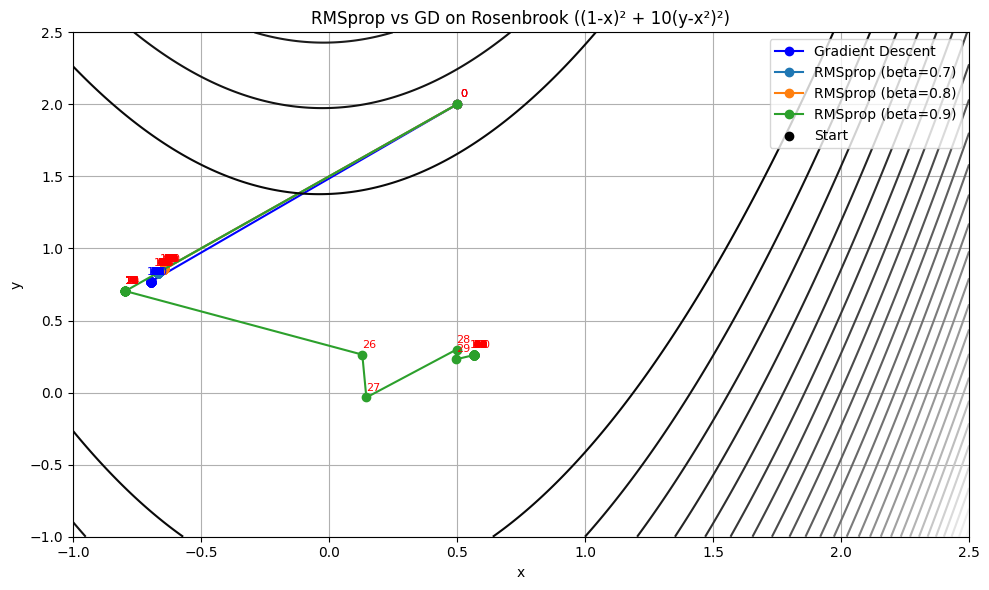

In [227]:
# Plot contours of f2 and paths taken by GD and Nesterov
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-1, 2.5, 400)
y_vals = np.linspace(-1, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1-X)**2 + 10*(Y - X**2)**2

# Run gradient descent with backtracking
path_gd_f3 = gradient_descent_backtracking(
    lambda x: f3(x, 1, 10),
    lambda x: grad_f3(x, 1, 10),
    start_f3, max_iter
)
plt.plot(path_gd_f3[:, 0], path_gd_f3[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f3)):
    plt.annotate(i, (path_gd_f3[i, 0], path_gd_f3[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# RMSprop with various momentum values
beta_values_f3 = [0.7, 0.8, 0.9]
for beta in beta_values_f3:
    path_hb_f3 = rmsprop(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3,
        beta=beta
    )
    plt.plot(path_hb_f3[:, 0], path_hb_f3[:, 1], 'o-', label=f'RMSprop (beta={beta})')

    # Annotate iterations for Nesterov
    for i in range(len(path_hb_f3)):
        plt.annotate(i, (path_hb_f3[i, 0], path_hb_f3[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f3, color='black', label='Start')
plt.title('RMSprop vs GD on Rosenbrook ((1-x)² + 10(y-x²)²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. RMSprop f3**

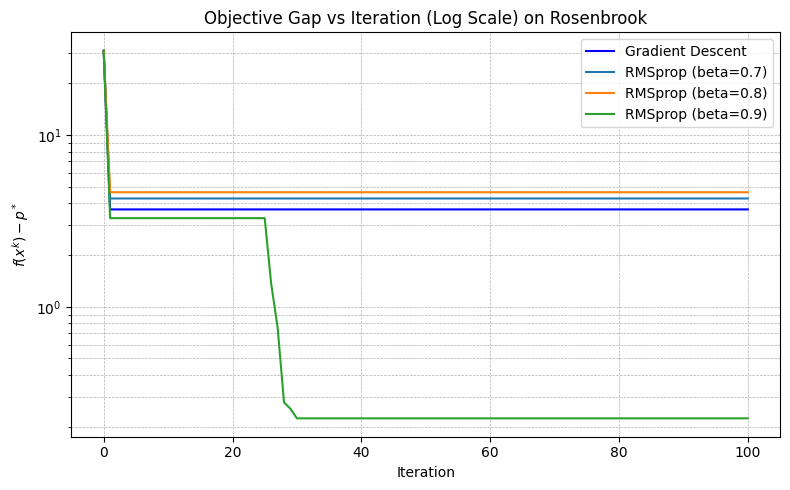

In [228]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f3 = np.array([f3(x, 1, 10) for x in path_gd_f3])
f_gap_gd_f3 = f_gd_f3 - p_star_f3
plt.plot(f_gap_gd_f3, label='Gradient Descent', color='blue')

# RMSprop objective gaps
for beta in beta_values_f3:
    path_hb_f3 = rmsprop(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3,
        beta=beta
    )
    f_hb_f3= np.array([f3(x, 1, 10) for x in path_hb_f3])
    f_gap_hb_f3 = f_hb_f3 - p_star_f3
    plt.plot(f_gap_hb_f3, label=f'RMSprop (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Rosenbrook')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adam f3**

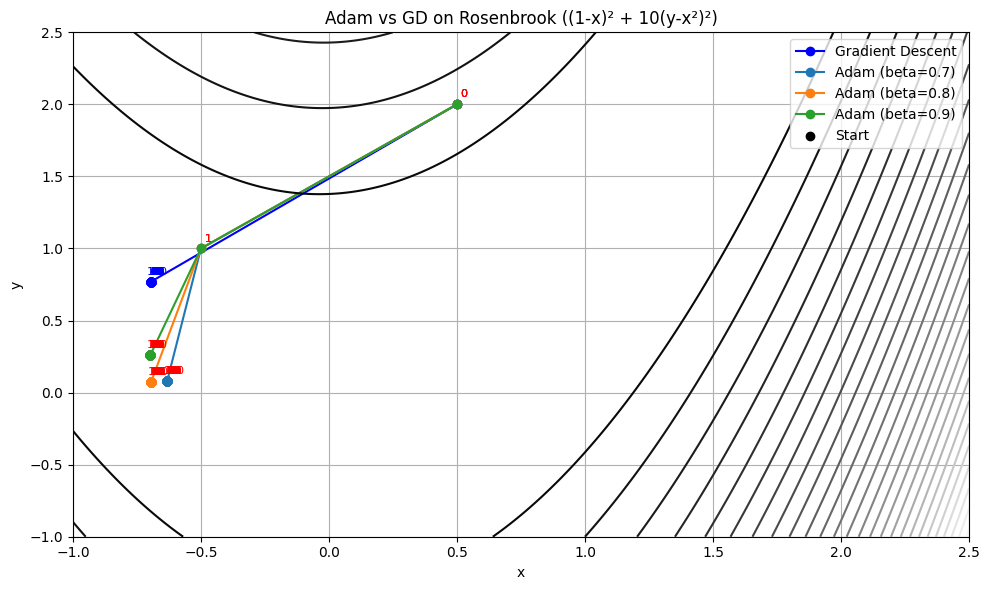

In [229]:
# Plot contours of f2 and paths taken by GD and Nesterov
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-1, 2.5, 400)
y_vals = np.linspace(-1, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1-X)**2 + 10*(Y - X**2)**2

# Run gradient descent with backtracking
path_gd_f3 = gradient_descent_backtracking(
    lambda x: f3(x, 1, 10),
    lambda x: grad_f3(x, 1, 10),
    start_f3, max_iter
)
plt.plot(path_gd_f3[:, 0], path_gd_f3[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f3)):
    plt.annotate(i, (path_gd_f3[i, 0], path_gd_f3[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adam with various momentum values
beta_values_f3 = [0.7, 0.8, 0.9]
for beta in beta_values_f3:
    path_hb_f3 = adam(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3,
        beta_1=beta,
        beta_2=beta
    )
    plt.plot(path_hb_f3[:, 0], path_hb_f3[:, 1], 'o-', label=f'Adam (beta={beta})')

    # Annotate iterations for Nesterov
    for i in range(len(path_hb_f3)):
        plt.annotate(i, (path_hb_f3[i, 0], path_hb_f3[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f3, color='black', label='Start')
plt.title('Adam vs GD on Rosenbrook ((1-x)² + 10(y-x²)²)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Adeam f3**

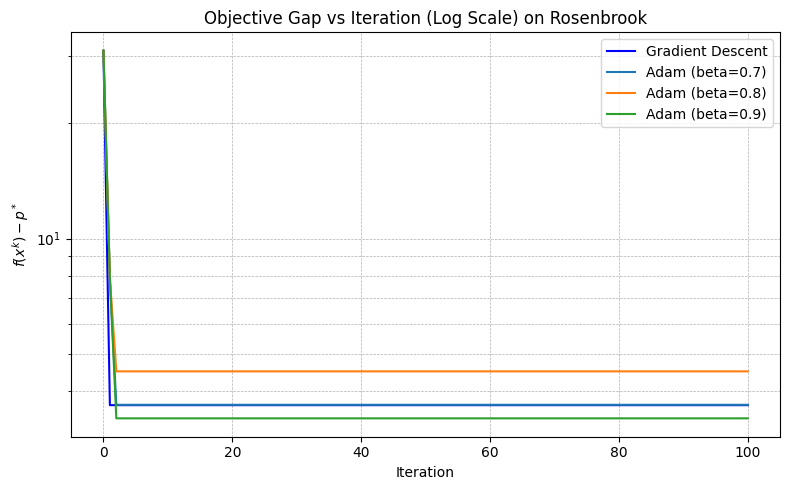

In [230]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f3 = np.array([f3(x, 1, 10) for x in path_gd_f3])
f_gap_gd_f3 = f_gd_f3 - p_star_f3
plt.plot(f_gap_gd_f3, label='Gradient Descent', color='blue')

# RMSprop objective gaps
for beta in beta_values_f3:
    path_hb_f3 = adam(
        lambda x: f3(x, 1, 10),
        lambda x: grad_f3(x, 1, 10),
        start_f3,
        beta_1=beta,
        beta_2=beta
    )
    f_hb_f3= np.array([f3(x, 1, 10) for x in path_hb_f3])
    f_gap_hb_f3 = f_hb_f3 - p_star_f3
    plt.plot(f_gap_hb_f3, label=f'Adam (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on Rosenbrook')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Convex Function f(x,y) = (x+y)^2**

In [231]:
# Define an rosenbrock function:
# f3(x, y) = (x + y)^2
def f4(x):
    return (x[0] + x[1])**2

# Gradient of the function
def grad_f4(x):
    return np.array([2*(x[0] + x[1]), 2*(x[0] + x[1])])

**Initialization**

In [232]:
# Use scipy.optimize.minimize to find the minimum value of f2
# The minimum is still at (0, 0), so p* should be 0
p_star_f4 = find_minimum(lambda x: f2(x), np.array([0.0, 0.0]))

In [233]:
# Start somewhere away from the minimum to visualize the ravine
start_f4 = np.array([2.0, 2.0])
max_iter = 100  # Fixed iteration count

**Contour Plot of Gradient Descent vs. Heavy Ball f4**

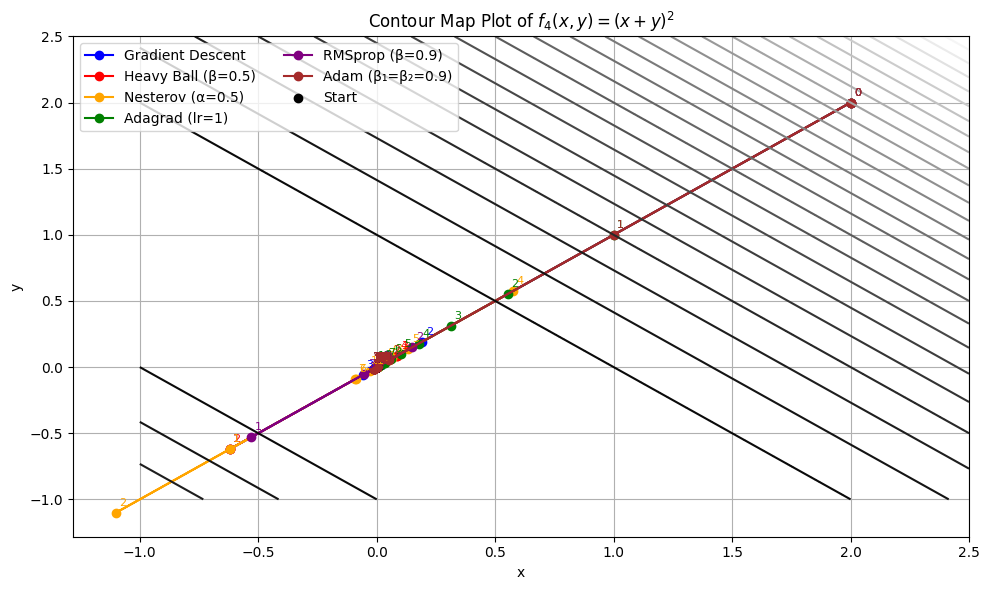

In [234]:
# Set up the figure for plotting the contour of the function
plt.figure(figsize=(10, 6))

# Define the grid for plotting the contour of the function

# Meshgrid for contour plotting
x_f1 = np.linspace(-2.5, 2.5, 400)
y_f1 = np.linspace(-2.5, 2.5, 400)
X_f1, Y_f1 = np.meshgrid(x_vals, y_vals)
Z_f1 = (X_f1+Y_f1)**2

# --- Plot Gradient Descent Path ---
path_gd_f4 = gradient_descent_backtracking(f4, grad_f4, start_f4, max_iter)
plt.plot(path_gd_f4[:, 0], path_gd_f4[:, 1], 'o-', label='Gradient Descent', color='blue')
for i in range(len(path_gd_f4)):
        plt.annotate(i, (path_gd_f4[i, 0], path_gd_f4[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', color='blue', fontsize=8)

# --- Plot Heavy Ball Path ---
beta_values_f4 = [0.5]
for beta in beta_values_f4:
    path_hb_f4 = heavy_ball_backtracking(f4, grad_f4, start_f4, beta, max_iter)
    plt.plot(path_hb_f4[:, 0], path_hb_f4[:, 1], 'o-', label=f'Heavy Ball (β={beta})', color='red')
    for i in range(len(path_hb_f4)):
            plt.annotate(i, (path_hb_f4[i, 0], path_hb_f4[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='red', fontsize=8)

# --- Plot Nesterov Path ---
alpha_values_f1 = [0.5]
for alpha in alpha_values_f1:
    path_nesterov_f4 = nesterov(f4, grad_f4, start_f4, alpha, max_iter)
    plt.plot(path_nesterov_f4[:, 0], path_nesterov_f4[:, 1], 'o-', label=f'Nesterov (α={alpha})', color='orange')
    for i in range(len(path_nesterov_f4)):
            plt.annotate(i, (path_nesterov_f4[i, 0], path_nesterov_f4[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='orange', fontsize=8)

# --- Plot Adagrad Path ---
lr_values_f1 = [1]
for lr in lr_values_f1:
    path_adagrad_f4 = adagrad(f4, grad_f4, start_f4, lr=lr)
    plt.plot(path_adagrad_f4[:, 0], path_adagrad_f4[:, 1], 'o-', label=f'Adagrad (lr={lr})', color='green')
    for i in range(len(path_adagrad_f4)):
            plt.annotate(i, (path_adagrad_f4[i, 0], path_adagrad_f4[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='green', fontsize=8)

# --- Plot RMSprop Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_rmsprop_f4 = rmsprop(f4, grad_f4, start_f4, beta=beta)
    plt.plot(path_rmsprop_f4[:, 0], path_rmsprop_f4[:, 1], 'o-', label=f'RMSprop (β={beta})', color='purple')
    for i in range(len(path_rmsprop_f4)):
            plt.annotate(i, (path_rmsprop_f4[i, 0], path_rmsprop_f4[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='purple', fontsize=8)

# --- Plot Adam Path ---
beta_values_f1 = [0.9]
for beta in beta_values_f1:
    path_adam_f4 = adam(f4, grad_f4, start_f4, beta_1=beta, beta_2=beta)
    plt.plot(path_adam_f4[:, 0], path_adam_f4[:, 1], 'o-', label=f'Adam (β₁=β₂={beta})', color='brown')
    for i in range(len(path_adam_f4)):
            plt.annotate(i, (path_adam_f4[i, 0], path_adam_f4[i, 1]), textcoords="offset points",
                         xytext=(5, 5), ha='center', color='brown', fontsize=8)

# --- Final Plotting ---
plt.contour(X_f1, Y_f1, Z_f1, levels=30, cmap='gray')
plt.scatter(*start_f1, color='black', label='Start')
plt.title('Contour Map Plot of $f_4(x, y) = (x+y)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of AGD f4**

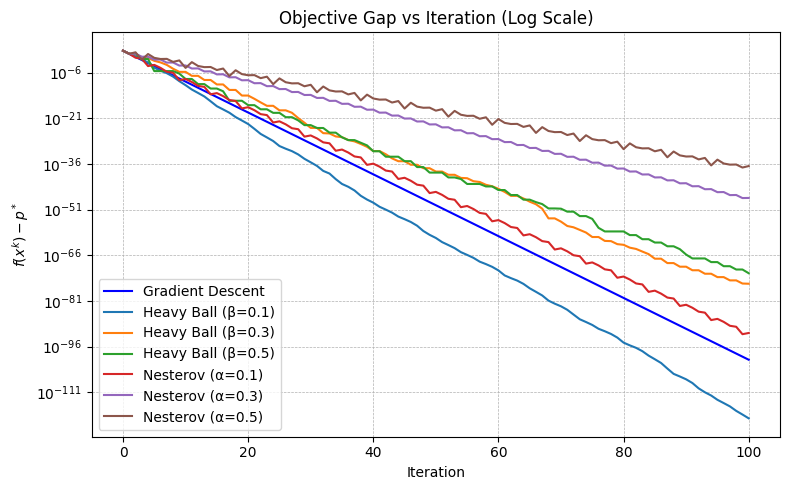

In [235]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd_f4 = np.array([f4(x) for x in path_gd_f4])
f_gap_gd_f4 = f_gd_f4 - p_star_f4
plt.plot(f_gap_gd_f4, label='Gradient Descent', color='blue')

# Plot Objective Gap for Heavy Ball
beta_values_f1 = [0.1, 0.3, 0.5]
for beta in beta_values_f1:
    path_hb = heavy_ball_backtracking(f4, grad_f4, start_f4, beta, max_iter)
    f_hb = np.array([f4(x) for x in path_hb])
    f_gap_hb = f_hb - p_star_f4
    plt.plot(f_gap_hb, label=f'Heavy Ball (β={beta})')

# Plot Objective Gap for Nesterov
for beta in beta_values_f1:
    path_nes = nesterov(f4, grad_f4, start_f4, beta, max_iter)
    f_nes = np.array([f4(x) for x in path_nes])
    f_gap_nes = f_nes - p_star_f4
    plt.plot(f_gap_nes, label=f'Nesterov (α={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Nesterov f4**

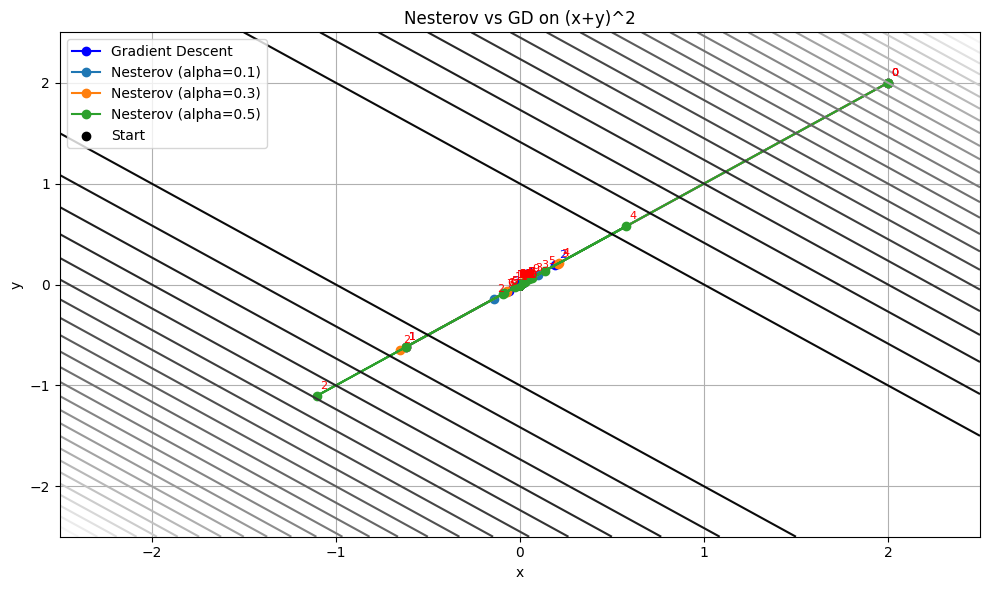

In [236]:
# Plot contours of f2 and paths taken by GD and Nesterov
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X+Y)**2

# Run gradient descent with backtracking
path_gd_f4 = gradient_descent_backtracking(
    lambda x: f4(x),
    lambda x: grad_f4(x),
    start_f2, max_iter
)
plt.plot(path_gd_f4[:, 0], path_gd_f4[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f4)):
    plt.annotate(i, (path_gd_f4[i, 0], path_gd_f4[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Nesterov with various momentum values
beta_values_f4 = [0.1, 0.3, 0.5]
for beta in beta_values_f4:
    path_hb_f4 = nesterov(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        alpha=beta
    )
    plt.plot(path_hb_f4[:, 0], path_hb_f4[:, 1], 'o-', label=f'Nesterov (alpha={beta})')

    # Annotate iterations for HB
    for i in range(len(path_hb_f4)):
        plt.annotate(i, (path_hb_f4[i, 0], path_hb_f4[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f4, color='black', label='Start')
plt.title('Nesterov vs GD on (x+y)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Nesterov f4**

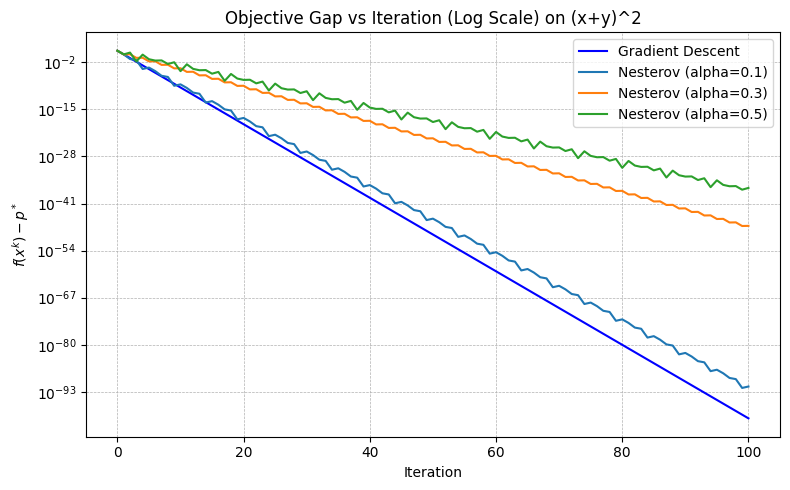

In [237]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f4 = np.array([f4(x) for x in path_gd_f4])
f_gap_gd_f4 = f_gd_f4 - p_star_f4
plt.plot(f_gap_gd_f4, label='Gradient Descent', color='blue')

# Heavy Ball objective gaps
for beta in beta_values_f4:
    path_hb_f4 = nesterov(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        alpha = beta
    )
    f_hb_f4 = np.array([f4(x) for x in path_hb_f4])
    f_gap_hb_f4 = f_hb_f4 - p_star_f4
    plt.plot(f_gap_hb_f4, label=f'Nesterov (alpha={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on (x+y)^2')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adagrad f4**

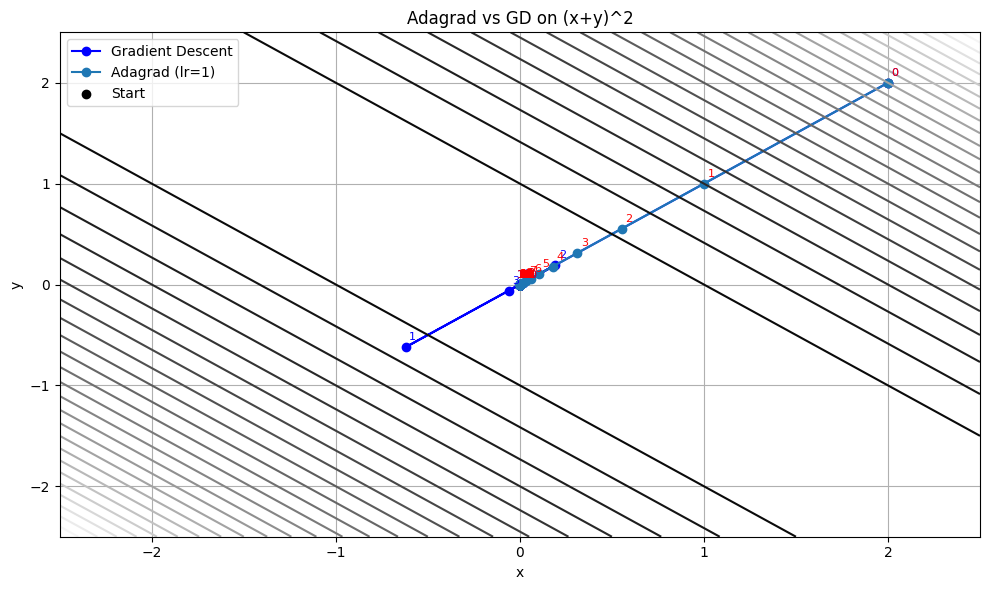

In [238]:
# Plot contours of f2 and paths taken by GD and Adagrad
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X+Y)**2

# Run gradient descent with backtracking
path_gd_f4 = gradient_descent_backtracking(
    lambda x: f4(x),
    lambda x: grad_f4(x),
    start_f2, max_iter
)
plt.plot(path_gd_f4[:, 0], path_gd_f4[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f4)):
    plt.annotate(i, (path_gd_f4[i, 0], path_gd_f4[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adagrad
beta_values_f4 = [1]
for beta in beta_values_f4:
    path_hb_f4 = adagrad(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        lr=beta
    )
    plt.plot(path_hb_f4[:, 0], path_hb_f4[:, 1], 'o-', label=f'Adagrad (lr={beta})')

    # Annotate iterations for HB
    for i in range(len(path_hb_f4)):
        plt.annotate(i, (path_hb_f4[i, 0], path_hb_f4[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f4, color='black', label='Start')
plt.title('Adagrad vs GD on (x+y)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot Adaptive f4**

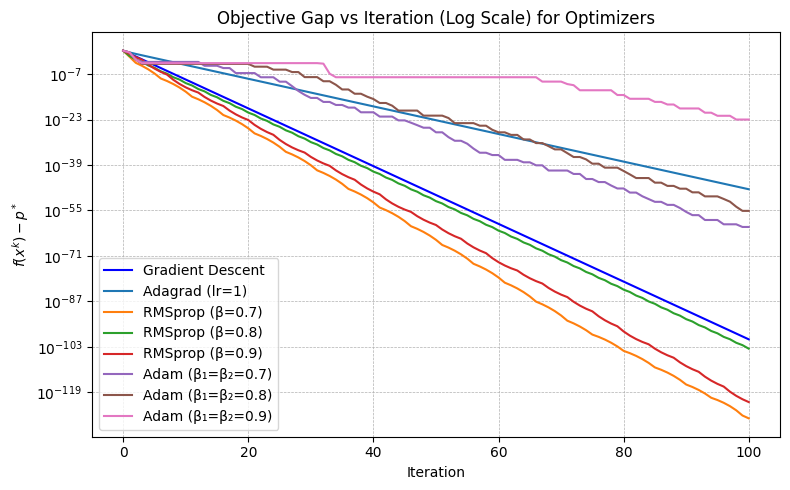

In [239]:
# Plot Objective Gap vs Iteration on a Logarithmic Scale
plt.figure(figsize=(8, 5))

# Plot Objective Gap for Gradient Descent
f_gd = np.array([f4(x) for x in path_gd_f4])
f_gap_gd = f_gd - p_star_f4
plt.plot(f_gap_gd, label='Gradient Descent', color='blue')

lr_values_f1 = [1]
# Plot Objective Gap for Adagrad
for lr in lr_values_f1:
    path_adagrad = adagrad(f4, grad_f4, start_f4, lr=lr)
    f_adagrad = np.array([f4(x) for x in path_adagrad])
    f_gap_adagrad = f_adagrad - p_star_f4
    plt.plot(f_gap_adagrad, label=f'Adagrad (lr={lr})')

beta_values_f1 = [0.7, 0.8, 0.9]
# Plot Objective Gap for RMSprop
for beta in beta_values_f1:
    path_rmsprop = rmsprop(f4, grad_f4, start_f4, beta=beta)
    f_rmsprop = np.array([f4(x) for x in path_rmsprop])
    f_gap_rmsprop = f_rmsprop - p_star_f4
    plt.plot(f_gap_rmsprop, label=f'RMSprop (β={beta})')

# Plot Objective Gap for Adam
for beta in beta_values_f1:
    path_adam = adam(f4, grad_f4, start_f4, beta_1=beta, beta_2=beta)
    f_adam = np.array([f4(x) for x in path_adam])
    f_gap_adam = f_adam - p_star_f4
    plt.plot(f_gap_adam, label=f'Adam (β₁=β₂={beta})')

# Plot settings
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) for Optimizers')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. RMSprop f4**

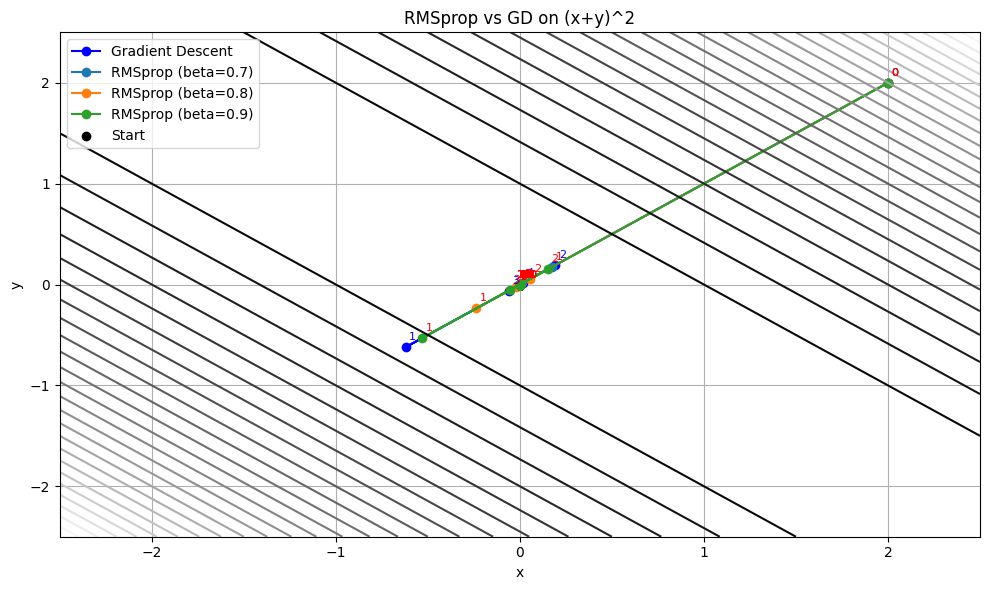

In [240]:
# Plot contours of f2 and paths taken by GD and RMSprop
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X+Y)**2

# Run gradient descent with backtracking
path_gd_f4 = gradient_descent_backtracking(
    lambda x: f4(x),
    lambda x: grad_f4(x),
    start_f2, max_iter
)
plt.plot(path_gd_f4[:, 0], path_gd_f4[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f4)):
    plt.annotate(i, (path_gd_f4[i, 0], path_gd_f4[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# RMSprop
beta_values_f4 = [0.7, 0.8, 0.9]
for beta in beta_values_f4:
    path_hb_f4 = rmsprop(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        beta=beta
    )
    plt.plot(path_hb_f4[:, 0], path_hb_f4[:, 1], 'o-', label=f'RMSprop (beta={beta})')

    # Annotate iterations for HB
    for i in range(len(path_hb_f4)):
        plt.annotate(i, (path_hb_f4[i, 0], path_hb_f4[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f4, color='black', label='Start')
plt.title('RMSprop vs GD on (x+y)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. RMSprop f4**

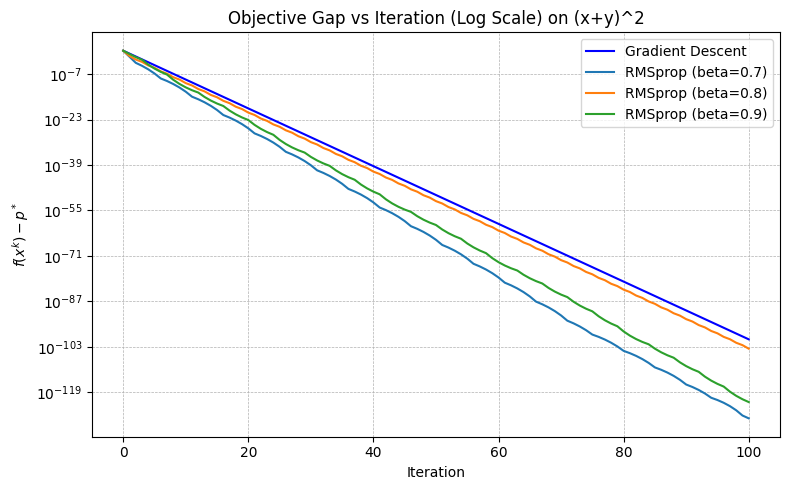

In [241]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f4 = np.array([f4(x) for x in path_gd_f4])
f_gap_gd_f4 = f_gd_f4 - p_star_f4
plt.plot(f_gap_gd_f4, label='Gradient Descent', color='blue')

# RMSprop objective gaps
for beta in beta_values_f4:
    path_hb_f4 = rmsprop(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        beta=beta
    )
    f_hb_f4 = np.array([f4(x) for x in path_hb_f4])
    f_gap_hb_f4 = f_hb_f4 - p_star_f4
    plt.plot(f_gap_hb_f4, label=f'RMSprop (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on (x+y)^2')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Contour Plot of Gradient Descent vs. Adam f4**

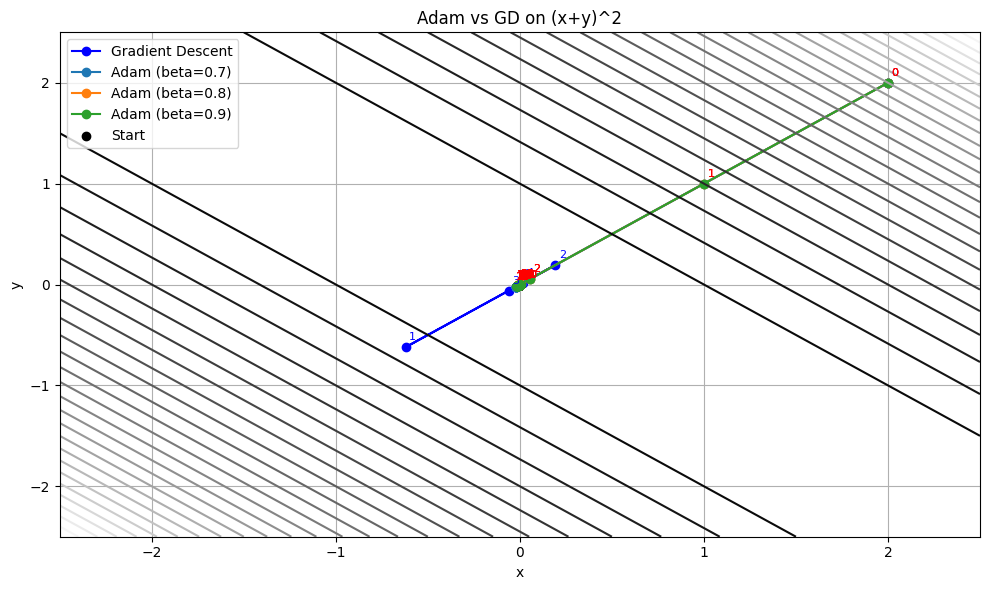

In [242]:
# Plot contours of f2 and paths taken by GD and Adam
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X+Y)**2

# Run gradient descent with backtracking
path_gd_f4 = gradient_descent_backtracking(
    lambda x: f4(x),
    lambda x: grad_f4(x),
    start_f2, max_iter
)
plt.plot(path_gd_f4[:, 0], path_gd_f4[:, 1], 'o-', label='Gradient Descent', color='blue')

# Annotate iterations for GD
for i in range(len(path_gd_f4)):
    plt.annotate(i, (path_gd_f4[i, 0], path_gd_f4[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# Adam
beta_values_f4 = [0.7, 0.8, 0.9]
for beta in beta_values_f4:
    path_hb_f4 = adam(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        beta_1=beta,
        beta_2=beta
    )
    plt.plot(path_hb_f4[:, 0], path_hb_f4[:, 1], 'o-', label=f'Adam (beta={beta})')

    # Annotate iterations for HB
    for i in range(len(path_hb_f4)):
        plt.annotate(i, (path_hb_f4[i, 0], path_hb_f4[i, 1]), textcoords="offset points",
                     xytext=(5, 5), ha='center', fontsize=8, color='red')

# Plot contour lines
plt.contour(X, Y, Z, levels=30, cmap='gray')
plt.scatter(*start_f4, color='black', label='Start')
plt.title('Adam vs GD on (x+y)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Objective Gap Plot of Gradient Descent vs. Adam f4**

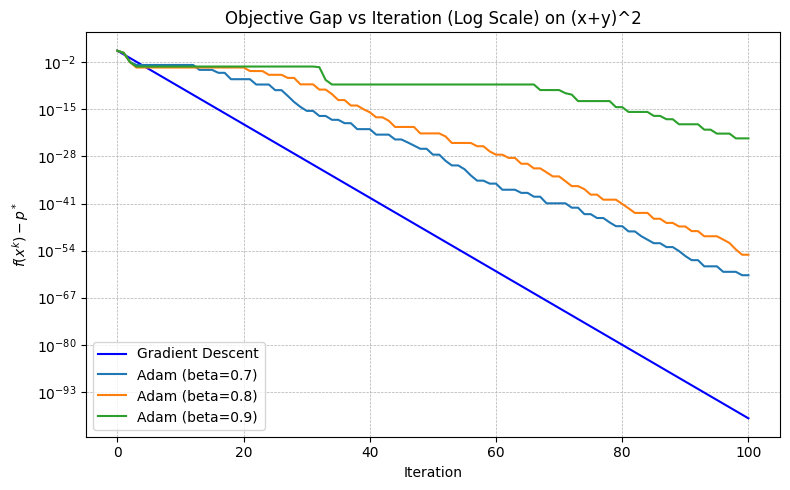

In [243]:
# Plot f(x^k) - p* over iterations on a log scale to compare convergence
plt.figure(figsize=(8, 5))

# GD objective gap
f_gd_f4 = np.array([f4(x) for x in path_gd_f4])
f_gap_gd_f4 = f_gd_f4 - p_star_f4
plt.plot(f_gap_gd_f4, label='Gradient Descent', color='blue')

# Adam objective gaps
for beta in beta_values_f4:
    path_hb_f4 = adam(
        lambda x: f4(x),
        lambda x: grad_f4(x),
        start_f2,
        beta_1=beta,
        beta_2=beta
    )
    f_hb_f4 = np.array([f4(x) for x in path_hb_f4])
    f_gap_hb_f4 = f_hb_f4 - p_star_f4
    plt.plot(f_gap_hb_f4, label=f'Adam (beta={beta})')

# Use log scale for better visualization of convergence rates
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x^k) - p^*$')
plt.title('Objective Gap vs Iteration (Log Scale) on (x+y)^2')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Saddle Point Test**

In [244]:
# f3(x, y) = 0.1x^2 - 10y^2
def f5(x):
    return 0.1*x[0]**2 - 10*x[1]**2

# Gradient of the function
def grad_f5(x):
    return np.array([0.2*x[0], -20*x[1]])

**Initialization**

In [245]:
# Start somewhere away from the minimum to visualize the ravine
start_f5 = np.array([2.0, 2.0])
max_iter = 100

**Contour Saddlepoint**

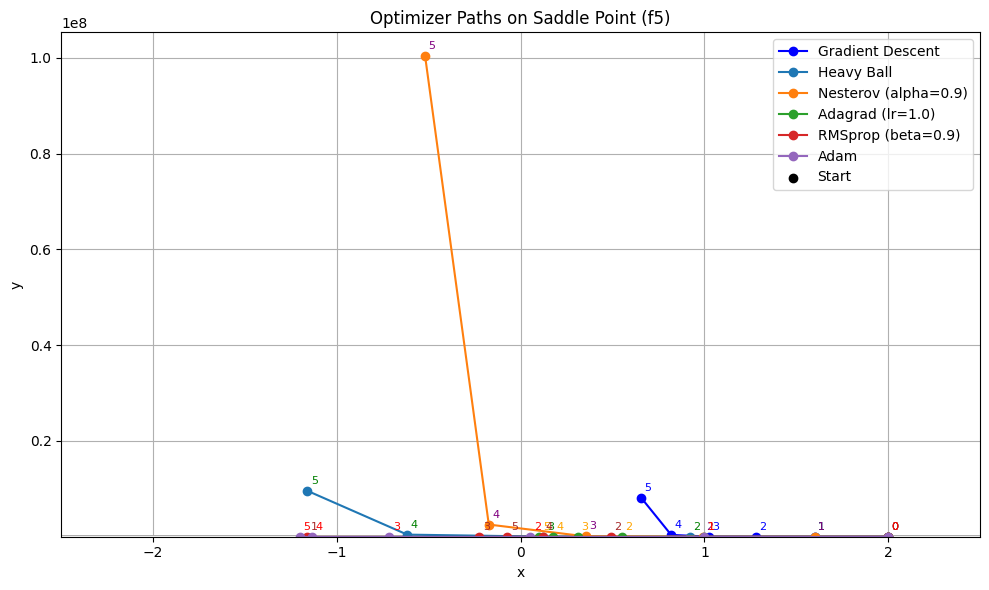

In [246]:
# Plot contours of f5 and paths taken by GD, Adam, HB, etc.
plt.figure(figsize=(10, 6))

# Meshgrid for contour plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.1*X**2 - 10*Y**2  # for f5

# Plot contour lines first
plt.contour(X, Y, Z, levels=30, cmap='gray')

# --- Gradient Descent ---
path_gd_f5 = gradient_descent_backtracking(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    max_iter=5
)
plt.plot(path_gd_f5[:, 0], path_gd_f5[:, 1], 'o-', label='Gradient Descent', color='blue')

for i in range(len(path_gd_f5)):
    plt.annotate(i, (path_gd_f5[i, 0], path_gd_f5[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='blue')

# --- Heavy Ball ---
path_hb = heavy_ball_backtracking(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    beta=0.9,
    max_iter=5
)
plt.plot(path_hb[:, 0], path_hb[:, 1], 'o-', label=f'Heavy Ball')

for i in range(len(path_hb)):
    plt.annotate(i, (path_hb[i, 0], path_hb[i, 1]), textcoords="offset points",
                  xytext=(5, 5), ha='center', fontsize=8, color='green')

# --- Nesterov ---
path_nes = nesterov(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    alpha=0.9,
    max_iter=5
)
plt.plot(path_nes[:, 0], path_nes[:, 1], 'o-', label=f'Nesterov (alpha={beta})')

for i in range(len(path_nes)):
    plt.annotate(i, (path_nes[i, 0], path_nes[i, 1]), textcoords="offset points",
                  xytext=(5, 5), ha='center', fontsize=8, color='purple')

# --- Adagrad ---
path_ada = adagrad(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    lr=1.0,
    max_iter=5
)
plt.plot(path_ada[:, 0], path_ada[:, 1], 'o-', label='Adagrad (lr=1.0)')

for i in range(len(path_ada)):
    plt.annotate(i, (path_ada[i, 0], path_ada[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='orange')

# --- RMSprop ---
path_rms = rmsprop(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    beta=0.9,
    max_iter=5
)
plt.plot(path_rms[:, 0], path_rms[:, 1], 'o-', label='RMSprop (beta=0.9)')

for i in range(len(path_rms)):
    plt.annotate(i, (path_rms[i, 0], path_rms[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='brown')

# --- Adam ---
path_adam = adam(
    lambda x: f5(x),
    lambda x: grad_f5(x),
    start_f5,
    beta_1=0.9,
    beta_2=0.9,
    max_iter=5
)
plt.plot(path_adam[:, 0], path_adam[:, 1], 'o-', label='Adam')

for i in range(len(path_adam)):
    plt.annotate(i, (path_adam[i, 0], path_adam[i, 1]), textcoords="offset points",
                 xytext=(5, 5), ha='center', fontsize=8, color='red')

# --- Starting Point ---
plt.scatter(*start_f5, color='black', label='Start')

# --- Finishing Plot ---
plt.title('Optimizer Paths on Saddle Point (f5)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


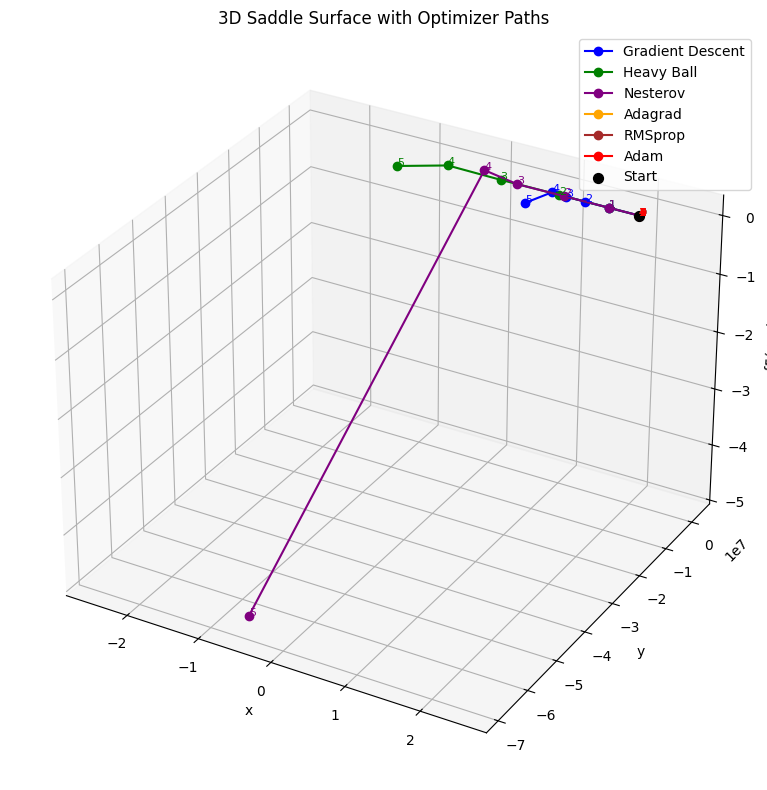

In [247]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def f5(x):
    return 0.1*x[0]**2 - 10*x[1]**2

def grad_f5(x):
    return np.array([2*0.1*x[0], 2*10*x[1]])

# Your optimizer functions go here...
# Assume you have the functions:
# - gradient_descent_backtracking
# - heavy_ball_backtracking
# - nesterov
# - adagrad
# - rmsprop
# - adam

# Starting point and setup
start_f5 = np.array([2.0, 2.0])
max_iter = 5

# Meshgrid for surface plot
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.1*X**2 - 10*Y**2

# Start 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D saddle surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Plot paths from optimizers
def plot_path(path, label, color):
    ax.plot(path[:, 0], path[:, 1], [f5(p) for p in path], 'o-', label=label, color=color)
    for i, p in enumerate(path):
        ax.text(p[0], p[1], f5(p), str(i), fontsize=8, color=color)

# Gradient Descent
path_gd_f5 = gradient_descent_backtracking(f5, grad_f5, start_f5, max_iter=max_iter)
plot_path(path_gd_f5, 'Gradient Descent', 'blue')

# Heavy Ball
path_hb = heavy_ball_backtracking(f5, grad_f5, start_f5, beta=0.9, max_iter=max_iter)
plot_path(path_hb, 'Heavy Ball', 'green')

# Nesterov
path_nes = nesterov(f5, grad_f5, start_f5, alpha=0.9, max_iter=max_iter)
plot_path(path_nes, 'Nesterov', 'purple')

# Adagrad
path_ada = adagrad(f5, grad_f5, start_f5, lr=1.0, max_iter=max_iter)
plot_path(path_ada, 'Adagrad', 'orange')

# RMSprop
path_rms = rmsprop(f5, grad_f5, start_f5, beta=0.9, max_iter=max_iter)
plot_path(path_rms, 'RMSprop', 'brown')

# Adam
path_adam = adam(f5, grad_f5, start_f5, beta_1=0.9, beta_2=0.9, max_iter=max_iter)
plot_path(path_adam, 'Adam', 'red')

# Starting point
ax.scatter(*start_f5, f5(start_f5), color='black', s=50, label='Start')

# Axes labels and title
ax.set_title('3D Saddle Surface with Optimizer Paths')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f5(x, y)')
ax.legend()
plt.tight_layout()
plt.show()
